In [67]:
import json
import joblib
import pickle
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier



import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import fairlearn

In [68]:
df=pd.read_csv('two-years-recid.csv')#.set_index('id')
df

,id,name,sex,dob,age,race,c_jail_in,c_jail_out,c_case_number,c_offense_date,...,r_case_number,r_offense_date,r_charge_degree,r_charge_desc,is_violent_recid,vr_case_number,vr_offense_date,vr_charge_degree,vr_charge_desc,two_year_recid
0,1,steven lux,Male,1953-06-15,62,Caucasian,2013-01-05 04:35:31,2013-01-07 03:18:03,13000208CF10A,2013-01-05,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
1,2,andre small,Male,1987-10-01,28,African-American,2013-04-02 12:18:46,2013-04-04 07:54:22,13006354MM10A,2013-04-02,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
2,3,willie gray,Male,1959-01-12,57,African-American,2014-10-31 12:02:01,2014-10-31 01:47:05,14040148MU10A,2014-10-30,...,15043364TC20A,2015-07-23,(M2),Driving License Suspended,0,NaN,NaN,NaN,NaN,1
3,4,nickson marcellus,Male,1996-07-11,19,African-American,2014-01-23 03:19:30,2014-01-23 01:04:34,13017969CF10A,NaN,...,16000241MM20A,2016-01-04,(M1),Possess Cannabis/20 Grams Or Less,0,NaN,NaN,NaN,NaN,1
4,5,patria barnes,Female,1978-06-06,37,Other,2013-12-08 01:55:28,2013-12-09 02:00:59,13022717MM10A,2013-12-07,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6109,6110,seccunda davis,Male,1987-05-13,28,African-American,2013-08-18 07:25:24,2013-08-19 09:01:42,13015644MM10A,2013-08-18,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
6110,6111,mark montgomery,Male,1985-11-03,30,African-American,2013-03-23 01:32:34,2013-03-28 09:37:27,13005696MM10A,2013-03-23,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
6111,6112,erica johnson,Female,1982-06-23,33,Caucasian,2013-09-29 09:25:30,2013-09-30 09:59:37,13013661CF10A,2013-09-29,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
6112,6113,barry williams,Male,1988-04-22,27,African-American,2013-10-30 03:40:14,2013-12-07 01:53:45,13004112MM10A,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0


In [71]:
df_newData=pd.read_csv('testing_data.csv')#.set_index('id')
# Rename 'outcome' column to 'is_recid' in df_newData
df_newData = df_newData.rename(columns={'outcome': 'is_recid'})

df_newData

,id,observation_id,observation,is_recid,predicted_outcome
0,1,a1b2c34567,"{""id"": ""a1b2c34567"", ""name"": ""6cea57c2fb6cbc2a...",False,False
1,2,id_KVNBmR0jEq6hJBXN3L-rig,"{""id"": ""id_KVNBmR0jEq6hJBXN3L-rig"", ""name"": ""6...",False,False
2,4,a1b2c3,"{""id"": ""a1b2c3"", ""name"": ""6cea57c2fb6cbc2a4041...",False,False
3,5,id_Tg8QFyQtDsqrL5CUerOgfA,"{""id"": ""id_Tg8QFyQtDsqrL5CUerOgfA"", ""name"": ""5...",True,True
4,8,id_GcxyawOeJ8IJe-mRm1otGg,"{""id"": ""id_GcxyawOeJ8IJe-mRm1otGg"", ""name"": ""c...",True,True
...,...,...,...,...,...
98,154,6214,"{""id"": ""6214"", ""name"": ""1d2f5dc631382b7ce59b90...",True,True
99,51,6148,"{""id"": ""6148"", ""name"": ""6682975fb002c5b8bae1d7...",True,True
100,63,6156,"{""id"": ""6156"", ""name"": ""5d11ce6ab0698a6eeb2fff...",False,False
101,84,6171,"{""id"": ""6171"", ""name"": ""e479cddd859753537047bd...",False,False


In [70]:
import pandas as pd
import json


# Parse the JSON content in the 'observation' column
df_newData['observation_parsed'] = df_newData['observation'].apply(json.loads)

# Extract specific fields from the parsed JSON
observation_fields = ['id', 'name', 'sex', 'dob', 'race', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count', 'c_case_number', 'c_charge_degree', 'c_charge_desc','c_arrest_date', 'c_offense_date', 'c_jail_in']

for field in observation_fields:
    df_newData[field] = df_newData['observation_parsed'].apply(lambda x: x.get(field, None))

# Drop the parsed JSON column
df_newData.drop(columns=['observation_parsed'], inplace=True)

df_newData = df_newData[df_newData['observation_id'] != 'id_KVNBmR0jEq6hJBXN3L-rig']
df_newData = df_newData[df_newData['observation_id'] != 'a1b2c34567']
df_newData = df_newData[df_newData['observation_id'] != 'a1b2c3']


df_newData = df_newData.dropna(subset=['c_jail_in'])


# Select and display the specified columns
selected_columns = ['id', 'name', 'sex', 'dob', 'race', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count', 'c_case_number', 'c_charge_degree', 'c_charge_desc','c_arrest_date', 'c_offense_date', 'c_jail_in', 'is_recid']
df_newData = df_newData[selected_columns]
df_newData

,id,name,sex,dob,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,c_case_number,c_charge_degree,c_charge_desc,c_arrest_date,c_offense_date,c_jail_in,is_recid
3,id_Tg8QFyQtDsqrL5CUerOgfA,5e38c513e15e7403c94607976abf8eab7c36599d95c520...,Male,1993-11-29,African-American,0,0,0,3,14013297CF10A,F,Uttering a Forged Instrument,None,2014-10-02,2014-10-02 12:14:45,True
4,id_GcxyawOeJ8IJe-mRm1otGg,c5ceeee824f1d08705e219a9c2034f46832b9fad326975...,Male,1984-11-11,African-American,0,0,0,4,13002220MM10A,M,Possess Cannabis/20 Grams Or Less,None,2013-01-02,2013-04-14 05:41:17,True
5,id_wpJSaKaaQWN3e_ZVPkvupQ,417b56bdfcece4d2f662b4d3484e7f7ff9188ded633188...,Male,1984-10-30,African-American,5,0,0,10,13005996CF10A,F,arrest case no charge,2013-05-23,None,2013-05-23 11:03:27,True
6,id_6aGB5--kVi8zHV_g3amr0g,6a1509faa169e4773ed58a7aabe628d4583cbedb92014c...,Female,1991-08-14,Caucasian,0,0,0,0,14000021CF10A,F,Uttering a Forged Instrument,None,2013-12-31,2013-12-31 05:48:21,False
7,id_koYmh96ITBrTmOQvAAxG8Q,6d0696724f82e67b74c6d9e56973c79bed880fc5e192ee...,Male,1994-10-08,African-American,0,0,0,0,14002622MM10A,M,Battery,None,2014-02-14,2014-02-14 08:57:29,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,6214,1d2f5dc631382b7ce59b90bfc1623fbdcfbdb90ead8804...,Male,1982-02-20,Caucasian,0,0,1,5,13013401CF10A,F,"Poss3,4 Methylenedioxymethcath",None,2013-09-23,2013-09-24 01:51:29,True
99,6148,6682975fb002c5b8bae1d7f96ac902e11f3e746622ad51...,Male,1978-09-27,African-American,1,8,5,23,13016391CF10A,F,Deliver Cocaine,None,2013-11-25,2013-11-25 06:28:32,True
100,6156,5d11ce6ab0698a6eeb2fffc99b80f6d7ac89f82e38ebef...,Male,1957-08-11,Caucasian,0,0,0,5,13007654MM10A,M,Possess Cannabis/20 Grams Or Less,None,2013-04-20,2013-04-20 12:49:59,False
101,6171,e479cddd859753537047bdda902479e18849af944cc92f...,Female,1986-06-28,African-American,0,0,0,0,14002682CF10A,F,Possession of Cocaine,None,2014-02-25,2014-02-25 10:19:07,False


In [9]:
# Adding a column to each DataFrame to distinguish the source
df_newData['source'] = 'New Data'
df['source'] = 'Initial Data'

In [10]:
# Filter for rows where 'c_arrest_date', 'c_offense_date', and 'c_jail_in' are null
df_newData = df_newData[~df_newData[['c_arrest_date', 'c_offense_date', 'c_jail_in']].isnull().all(axis=1)]
df_newData

,id,name,sex,dob,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,c_case_number,c_charge_degree,c_charge_desc,c_arrest_date,c_offense_date,c_jail_in,is_recid,source
0,a1b2c34567,6cea57c2fb6cbc2a40411135005760f241fffc3e5e67ab...,Male,1990-01-01,White,0,1,0,2,case1234,M,Theft,2023-01-02,2023-01-01,2023-01-03,False,New Data
2,a1b2c3,6cea57c2fb6cbc2a40411135005760f241fffc3e5e67ab...,Male,1990-01-01,Caucasian,2,1,0,5,A123456,F,Burglary,2022-01-02,2022-01-01,2022-01-03,False,New Data
3,id_Tg8QFyQtDsqrL5CUerOgfA,5e38c513e15e7403c94607976abf8eab7c36599d95c520...,Male,1993-11-29,African-American,0,0,0,3,14013297CF10A,F,Uttering a Forged Instrument,None,2014-10-02,2014-10-02 12:14:45,True,New Data
4,id_GcxyawOeJ8IJe-mRm1otGg,c5ceeee824f1d08705e219a9c2034f46832b9fad326975...,Male,1984-11-11,African-American,0,0,0,4,13002220MM10A,M,Possess Cannabis/20 Grams Or Less,None,2013-01-02,2013-04-14 05:41:17,True,New Data
5,id_wpJSaKaaQWN3e_ZVPkvupQ,417b56bdfcece4d2f662b4d3484e7f7ff9188ded633188...,Male,1984-10-30,African-American,5,0,0,10,13005996CF10A,F,arrest case no charge,2013-05-23,None,2013-05-23 11:03:27,True,New Data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,6214,1d2f5dc631382b7ce59b90bfc1623fbdcfbdb90ead8804...,Male,1982-02-20,Caucasian,0,0,1,5,13013401CF10A,F,"Poss3,4 Methylenedioxymethcath",None,2013-09-23,2013-09-24 01:51:29,True,New Data
99,6148,6682975fb002c5b8bae1d7f96ac902e11f3e746622ad51...,Male,1978-09-27,African-American,1,8,5,23,13016391CF10A,F,Deliver Cocaine,None,2013-11-25,2013-11-25 06:28:32,True,New Data
100,6156,5d11ce6ab0698a6eeb2fffc99b80f6d7ac89f82e38ebef...,Male,1957-08-11,Caucasian,0,0,0,5,13007654MM10A,M,Possess Cannabis/20 Grams Or Less,None,2013-04-20,2013-04-20 12:49:59,False,New Data
101,6171,e479cddd859753537047bdda902479e18849af944cc92f...,Female,1986-06-28,African-American,0,0,0,0,14002682CF10A,F,Possession of Cocaine,None,2014-02-25,2014-02-25 10:19:07,False,New Data


In [11]:
# 1. Introduction to the Dataset
print("The dataset contains information on recidivism, including demographics, criminal history, and recidivism scores.")

# 2. Data Overview
print(f"The dataset contains {df.shape[0]} records and {df.shape[1]} features.")


The dataset contains information on recidivism, including demographics, criminal history, and recidivism scores.
The dataset contains 6114 records and 36 features.


### REMOVING ROWS FOR GOAL

In [12]:
df = df.dropna(subset=['c_jail_out'])

# Suppose df_test has some different values, so we'll modify it directly
# Convert columns to datetime if they are not already
df['c_jail_in'] = pd.to_datetime(df['c_jail_in'])
df['c_jail_out'] = pd.to_datetime(df['c_jail_out'])

df['r_offense_date'] = pd.to_datetime(df['r_offense_date'])


#df.drop(columns=['two_year_recid'], inplace=True)
### Clean dataset to target variable

# Calculate the difference between 'r_offense_date' and 'c_jail_out'
df['offense_jail_duration'] = (df['r_offense_date'] - df['c_jail_out']).dt.days

# Create a new column based on your conditions
df['two_year_recid'] = ((df['is_recid'] == 1) & (df['offense_jail_duration'] <= 365 * 2)).astype(int)

#
df['is_recid']=df['two_year_recid']

/tmp/ipykernel_2483/3120417259.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['c_jail_in'] = pd.to_datetime(df['c_jail_in'])
/tmp/ipykernel_2483/3120417259.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['c_jail_out'] = pd.to_datetime(df['c_jail_out'])
/tmp/ipykernel_2483/3120417259.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

In [13]:
selected_columns = ['id', 'name', 'sex', 'dob', 'race', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count', 'c_case_number', 'c_charge_degree', 'c_charge_desc','c_arrest_date', 'c_offense_date', 'c_jail_in', 'is_recid','source']
df = df[selected_columns]
df

,id,name,sex,dob,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,c_case_number,c_charge_degree,c_charge_desc,c_arrest_date,c_offense_date,c_jail_in,is_recid,source
0,1,steven lux,Male,1953-06-15,Caucasian,0,0,0,0,13000208CF10A,F,False Imprisonment,NaN,2013-01-05,2013-01-05 04:35:31,0,Initial Data
1,2,andre small,Male,1987-10-01,African-American,0,0,0,1,13006354MM10A,M,Battery,NaN,2013-04-02,2013-04-02 12:18:46,0,Initial Data
2,3,willie gray,Male,1959-01-12,African-American,0,0,0,8,14040148MU10A,M,DUI Level 0.15 Or Minor In Veh,NaN,2014-10-30,2014-10-31 12:02:01,1,Initial Data
3,4,nickson marcellus,Male,1996-07-11,African-American,0,1,0,1,13017969CF10A,F,arrest case no charge,2014-01-23,NaN,2014-01-23 03:19:30,1,Initial Data
4,5,patria barnes,Female,1978-06-06,Other,0,0,0,0,13022717MM10A,M,Battery,NaN,2013-12-07,2013-12-08 01:55:28,0,Initial Data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6109,6110,seccunda davis,Male,1987-05-13,African-American,0,0,0,1,13015644MM10A,M,Battery,NaN,2013-08-18,2013-08-18 07:25:24,0,Initial Data
6110,6111,mark montgomery,Male,1985-11-03,African-American,0,0,0,4,13005696MM10A,M,Possess Cannabis/20 Grams Or Less,NaN,2013-03-23,2013-03-23 01:32:34,0,Initial Data
6111,6112,erica johnson,Female,1982-06-23,Caucasian,0,0,0,0,13013661CF10A,F,Felony Driving While Lic Suspd,NaN,2013-09-29,2013-09-29 09:25:30,0,Initial Data
6112,6113,barry williams,Male,1988-04-22,African-American,0,0,0,3,13004112MM10A,M,arrest case no charge,2013-10-30,NaN,2013-10-30 03:40:14,0,Initial Data


In [14]:
# Concatenate the DataFrames into df
combined_df = pd.concat([df_newData, df], ignore_index=True)
# Convert necessary columns to appropriate data types
combined_df['dob'] = pd.to_datetime(combined_df['dob'], errors='coerce')
combined_df['c_jail_in'] = pd.to_datetime(combined_df['c_jail_in'], errors='coerce')
combined_df['is_recid'] = combined_df['is_recid'].astype('bool')

# Calculate age at the time of 'c_jail_in'
combined_df['age'] = (combined_df['c_jail_in'] - combined_df['dob']).dt.days // 365

# Calculate the sum of juvenile counts after converting them to numeric
combined_df['juv_fel_count'] = pd.to_numeric(combined_df['juv_fel_count'], errors='coerce')
combined_df['juv_misd_count'] = pd.to_numeric(combined_df['juv_misd_count'], errors='coerce')
combined_df['juv_other_count'] = pd.to_numeric(combined_df['juv_other_count'], errors='coerce')
combined_df['juv_total_count'] = combined_df[['juv_fel_count', 'juv_misd_count', 'juv_other_count']].sum(axis=1)

# Remove rows where age is less than 18
#combined_df = combined_df[combined_df['age'] >= 16]

combined_df

,id,name,sex,dob,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,c_case_number,c_charge_degree,c_charge_desc,c_arrest_date,c_offense_date,c_jail_in,is_recid,source,age,juv_total_count
0,a1b2c34567,6cea57c2fb6cbc2a40411135005760f241fffc3e5e67ab...,Male,1990-01-01,White,0,1,0,2,case1234,M,Theft,2023-01-02,2023-01-01,2023-01-03 00:00:00,False,New Data,33.0,1
1,a1b2c3,6cea57c2fb6cbc2a40411135005760f241fffc3e5e67ab...,Male,1990-01-01,Caucasian,2,1,0,5,A123456,F,Burglary,2022-01-02,2022-01-01,2022-01-03 00:00:00,False,New Data,32.0,3
2,id_Tg8QFyQtDsqrL5CUerOgfA,5e38c513e15e7403c94607976abf8eab7c36599d95c520...,Male,1993-11-29,African-American,0,0,0,3,14013297CF10A,F,Uttering a Forged Instrument,None,2014-10-02,NaT,True,New Data,NaN,0
3,id_GcxyawOeJ8IJe-mRm1otGg,c5ceeee824f1d08705e219a9c2034f46832b9fad326975...,Male,1984-11-11,African-American,0,0,0,4,13002220MM10A,M,Possess Cannabis/20 Grams Or Less,None,2013-01-02,NaT,True,New Data,NaN,0
4,id_wpJSaKaaQWN3e_ZVPkvupQ,417b56bdfcece4d2f662b4d3484e7f7ff9188ded633188...,Male,1984-10-30,African-American,5,0,0,10,13005996CF10A,F,arrest case no charge,2013-05-23,None,NaT,True,New Data,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5943,6110,seccunda davis,Male,1987-05-13,African-American,0,0,0,1,13015644MM10A,M,Battery,NaN,2013-08-18,2013-08-18 07:25:24,False,Initial Data,26.0,0
5944,6111,mark montgomery,Male,1985-11-03,African-American,0,0,0,4,13005696MM10A,M,Possess Cannabis/20 Grams Or Less,NaN,2013-03-23,2013-03-23 01:32:34,False,Initial Data,27.0,0
5945,6112,erica johnson,Female,1982-06-23,Caucasian,0,0,0,0,13013661CF10A,F,Felony Driving While Lic Suspd,NaN,2013-09-29,2013-09-29 09:25:30,False,Initial Data,31.0,0
5946,6113,barry williams,Male,1988-04-22,African-American,0,0,0,3,13004112MM10A,M,arrest case no charge,2013-10-30,NaN,2013-10-30 03:40:14,False,Initial Data,25.0,0


### EDA

In [15]:
df.count()

id                 5854
name               5854
sex                5854
dob                5854
race               5854
juv_fel_count      5854
juv_misd_count     5854
juv_other_count    5854
priors_count       5854
c_case_number      5854
c_charge_degree    5854
c_charge_desc      5848
c_arrest_date       871
c_offense_date     4983
c_jail_in          5854
is_recid           5854
source             5854
dtype: int64

In [18]:
combined_df.count()

id                 5948
name               5948
sex                5948
dob                5948
race               5948
juv_fel_count      5948
juv_misd_count     5948
juv_other_count    5948
priors_count       5948
c_case_number      5948
c_charge_degree    5948
c_charge_desc      5942
c_arrest_date       889
c_offense_date     5061
c_jail_in          5856
is_recid           5948
source             5948
age                5856
juv_total_count    5948
dtype: int64

In [17]:
df.describe()

,id,juv_fel_count,juv_misd_count,juv_other_count,priors_count,c_jail_in,is_recid
count,5854.00000,5854.000000,5854.000000,5854.00000,5854.000000,5854,5854.000000
mean,3052.17424,0.063205,0.091561,0.10591,3.459857,2013-09-26 05:58:52.477793024,0.460711
min,1.00000,0.000000,0.000000,0.00000,0.000000,2013-01-01 03:16:15,0.000000
25%,1518.25000,0.000000,0.000000,0.00000,0.000000,2013-04-07 08:38:54.750000128,0.000000
50%,3046.50000,0.000000,0.000000,0.00000,2.000000,2013-09-13 02:36:35.500000,0.000000
75%,4584.75000,0.000000,0.000000,0.00000,5.000000,2014-01-26 04:40:32.249999872,1.000000
max,6114.00000,10.000000,13.000000,9.00000,38.000000,2016-03-11 10:26:16,1.000000
std,1766.09549,0.398745,0.490282,0.44983,4.906369,NaN,0.498497


In [19]:
combined_df.describe()

,dob,juv_fel_count,juv_misd_count,juv_other_count,priors_count,c_jail_in,age,juv_total_count
count,5948,5948.000000,5948.000000,5948.000000,5948.000000,5856,5856.000000,5948.000000
mean,1981-03-21 11:18:21.546738368,0.067418,0.093813,0.106422,3.483692,2013-09-27 08:14:14.632001280,32.066428,0.267653
min,1919-10-14 00:00:00,0.000000,0.000000,0.000000,0.000000,2013-01-01 03:16:15,16.000000,0.000000
25%,1973-11-10 18:00:00,0.000000,0.000000,0.000000,0.000000,2013-04-07 09:12:00.249999872,23.000000,0.000000
50%,1984-07-28 00:00:00,0.000000,0.000000,0.000000,2.000000,2013-09-13 04:10:42.500000,29.000000,0.000000
75%,1990-07-28 00:00:00,0.000000,0.000000,0.000000,5.000000,2014-01-26 05:47:27.500000,39.250000,0.000000
max,1998-01-20 00:00:00,20.000000,13.000000,9.000000,38.000000,2023-01-03 00:00:00,94.000000,20.000000
std,NaN,0.478206,0.503836,0.452491,4.933106,NaN,11.684108,0.930211


In [26]:
combined_df['is_recid'].unique()

array([0, 1])

In [21]:
# Convert necessary columns to appropriate data types
combined_df['dob'] = pd.to_datetime(combined_df['dob'], errors='coerce')
combined_df['c_jail_in'] = pd.to_datetime(combined_df['c_jail_in'], errors='coerce')
combined_df['is_recid'] = combined_df['is_recid'].astype('bool')

# Calculate age at the time of 'c_jail_in'
combined_df['age'] = (combined_df['c_jail_in'] - combined_df['dob']).dt.days // 365

# Create age bins

bins = [16, 25, 35, 45, 55, 65, 100]
labels = ['16-25', '26-35', '36-45', '46-55', '56-65', '66-100']
combined_df['age_group'] = pd.cut(combined_df['age'], bins=bins, labels=labels, right=False)


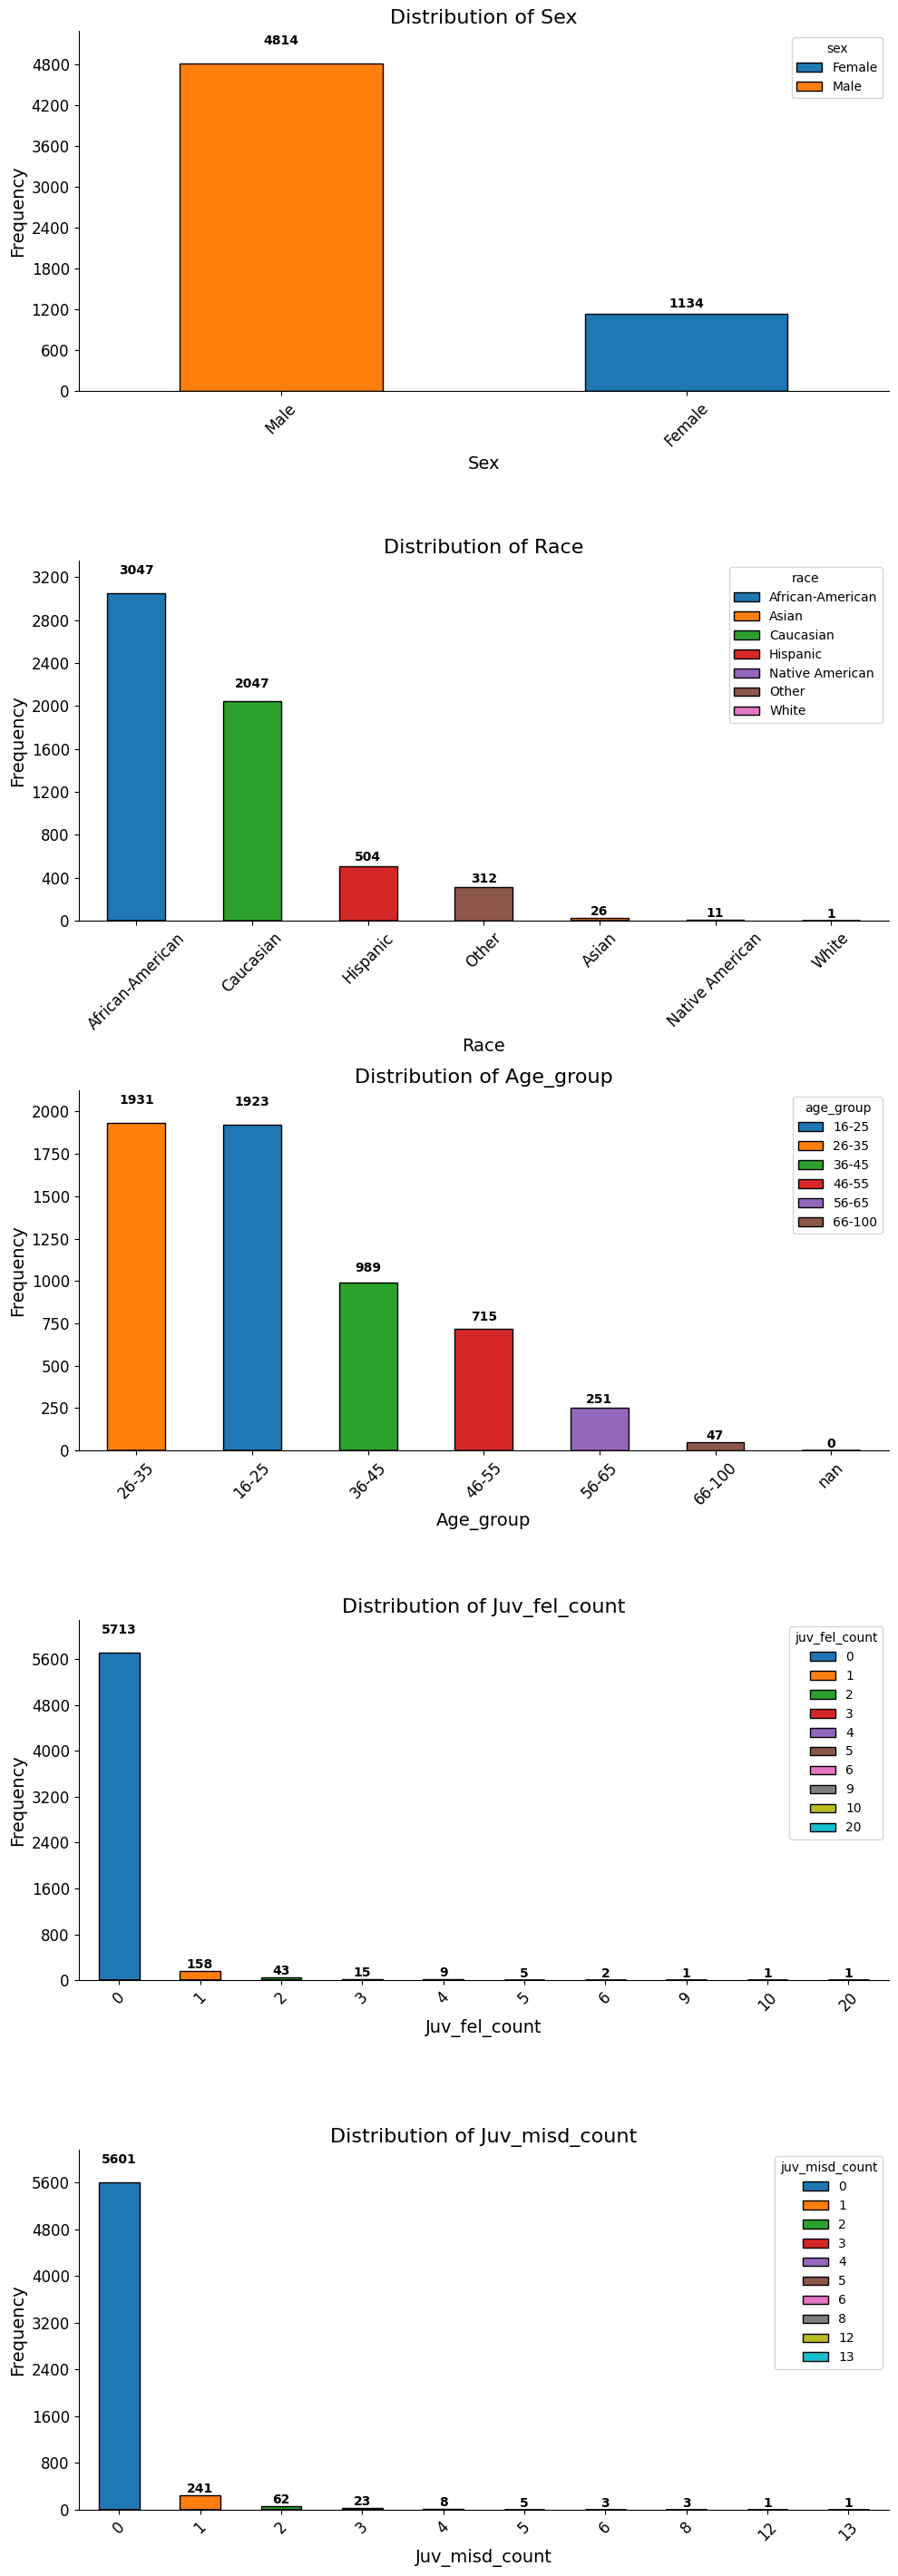

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import MaxNLocator

def plot_variable(ax, variable):
    cross_tab = pd.crosstab(combined_df[variable], combined_df[variable], dropna=False)
    # Sort the index in descending order based on the sum of rows
    cross_tab = cross_tab.loc[cross_tab.sum(axis=1).sort_values(ascending=False).index]
    bars = cross_tab.plot(kind='bar', stacked=True, ax=ax, edgecolor='black')
    ax.set_title(f'Distribution of {variable.capitalize()}', fontsize=16)
    ax.set_xlabel(variable.capitalize(), fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=12)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

    # Add combined totals on top of each bar
    totals = cross_tab.sum(axis=1)
    for i, total in enumerate(totals):
        ax.text(i, total + total * 0.05, f'{total}', ha='center', va='bottom', fontsize=10, fontweight='bold')

    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Set more ticks on the y-axis
    ax.yaxis.set_major_locator(MaxNLocator(nbins=10))  # You can adjust nbins for more or fewer ticks

    # Adjust y-axis limit to ensure there's enough space for the labels
    ax.set_ylim(0, max(totals) * 1.1)

def plot_multiple_variables(variables):
    n_vars = len(variables)
    fig, axes = plt.subplots(n_vars, 1, figsize=(10, 6 * n_vars))

    if n_vars == 1:
        plot_variable(axes, variables[0])
    else:
        for ax, variable in zip(axes, variables):
            plot_variable(ax, variable)

    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the top margin to make room for labels
    plt.show()

# Example usage
variables = ['sex', 'race', 'age_group','juv_fel_count','juv_misd_count']
#variables = ['juv_other_count','juv_total_count','priors_count', 'is_recid']  

plot_multiple_variables(variables)


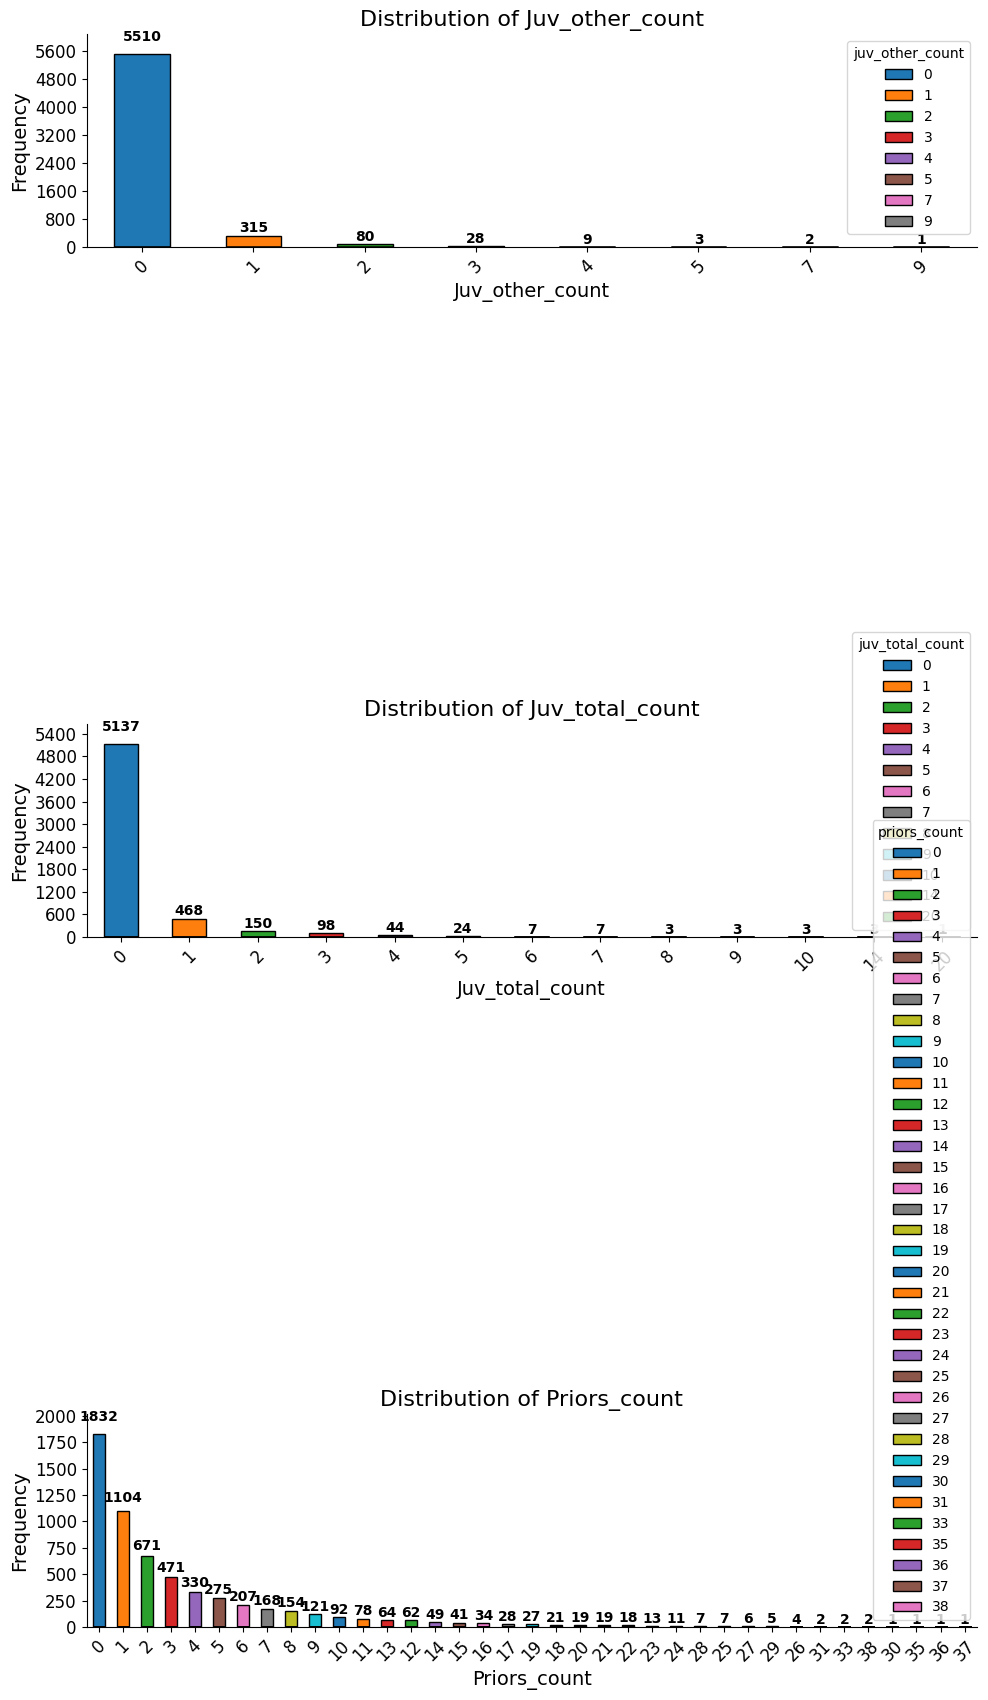

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import MaxNLocator

def plot_variable(ax, variable):
    cross_tab = pd.crosstab(combined_df[variable], combined_df[variable], dropna=False)
    # Sort the index in descending order based on the sum of rows
    cross_tab = cross_tab.loc[cross_tab.sum(axis=1).sort_values(ascending=False).index]
    bars = cross_tab.plot(kind='bar', stacked=True, ax=ax, edgecolor='black')
    ax.set_title(f'Distribution of {variable.capitalize()}', fontsize=16)
    ax.set_xlabel(variable.capitalize(), fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=12)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

    # Add combined totals on top of each bar
    totals = cross_tab.sum(axis=1)
    for i, total in enumerate(totals):
        ax.text(i, total + total * 0.05, f'{total}', ha='center', va='bottom', fontsize=10, fontweight='bold')

    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Set more ticks on the y-axis
    ax.yaxis.set_major_locator(MaxNLocator(nbins=10))  # You can adjust nbins for more or fewer ticks

    # Adjust y-axis limit to ensure there's enough space for the labels
    ax.set_ylim(0, max(totals) * 1.1)

def plot_multiple_variables(variables):
    n_vars = len(variables)
    fig, axes = plt.subplots(n_vars, 1, figsize=(10, 6 * n_vars))

    if n_vars == 1:
        plot_variable(axes, variables[0])
    else:
        for ax, variable in zip(axes, variables):
            plot_variable(ax, variable)

    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the top margin to make room for labels
    plt.show()

# Example usage
#variables = ['sex', 'race', 'age_group','juv_fel_count','juv_misd_count']
variables = ['juv_other_count','juv_total_count','priors_count']  

plot_multiple_variables(variables)


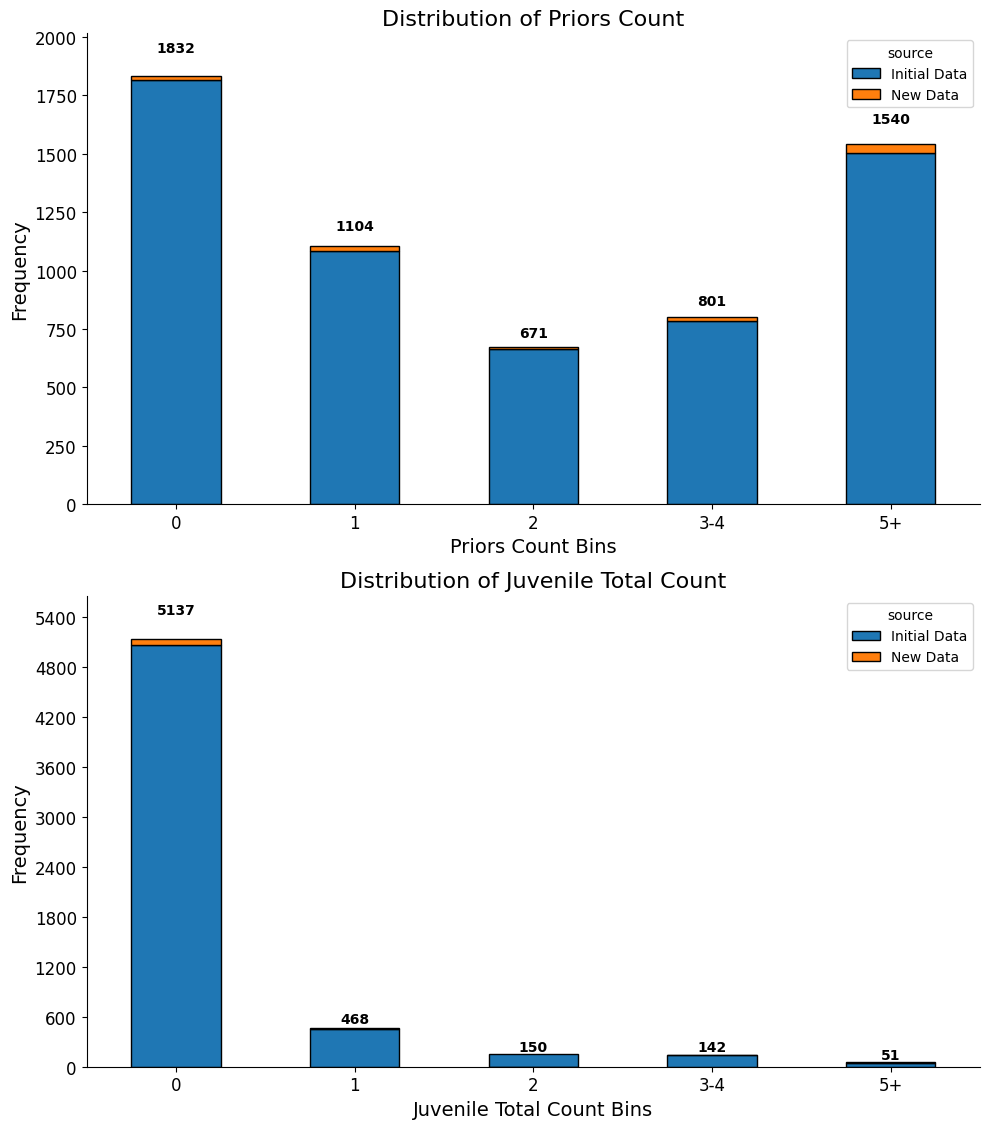

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Assuming combined_df is already defined with necessary columns

# Convert necessary columns to appropriate data types
combined_df['dob'] = pd.to_datetime(combined_df['dob'], errors='coerce')
combined_df['c_jail_in'] = pd.to_datetime(combined_df['c_jail_in'], errors='coerce')
combined_df['is_recid'] = combined_df['is_recid'].astype('bool')

# Calculate the sum of juvenile counts after converting them to numeric
combined_df['juv_fel_count'] = pd.to_numeric(combined_df['juv_fel_count'], errors='coerce')
combined_df['juv_misd_count'] = pd.to_numeric(combined_df['juv_misd_count'], errors='coerce')
combined_df['juv_other_count'] = pd.to_numeric(combined_df['juv_other_count'], errors='coerce')
combined_df['juv_total_count'] = combined_df[['juv_fel_count', 'juv_misd_count', 'juv_other_count']].sum(axis=1)

# Define bins for priors_count and juv_total_count
priors_bins = [0, 1, 2,3,5, float('inf')]  # Adjusted bins for priors_count
juv_total_bins = [0, 1, 2, 3, 5, float('inf')]  # Bins for sum of juvenile counts

labels_priors = ['0', '1', '2', '3-4', '5+']
labels_juv_total = ['0', '1', '2', '3-4', '5+']

combined_df['priors_count_bins'] = pd.cut(combined_df['priors_count'], bins=priors_bins, labels=labels_priors, right=False)
combined_df['juv_total_count_bins'] = pd.cut(combined_df['juv_total_count'], bins=juv_total_bins, labels=labels_juv_total, right=False)

# Function to create stacked bar plot for priors_count bins
def plot_priors_count(ax):
    cross_tab = pd.crosstab(combined_df['priors_count_bins'], combined_df['source'], dropna=False)

    # Plotting setup
    bars = cross_tab.plot(kind='bar', stacked=True, ax=ax, edgecolor='black')
    ax.set_title('Distribution of Priors Count', fontsize=16)
    ax.set_xlabel('Priors Count Bins', fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=12)
    for tick in ax.get_xticklabels():
        tick.set_rotation(0)  # Adjust rotation if needed

    # Add combined totals on top of each bar
    totals = cross_tab.sum(axis=1)
    for i, total in enumerate(totals):
        ax.text(i, total + total * 0.05, f'{total}', ha='center', va='bottom', fontsize=10, fontweight='bold')

    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Set more ticks on the y-axis
    ax.yaxis.set_major_locator(MaxNLocator(nbins=10))  # You can adjust nbins for more or fewer ticks

    # Adjust y-axis limit to ensure there's enough space for the labels
    ax.set_ylim(0, max(totals) * 1.1)

# Function to create stacked bar plot for sum of juvenile counts bins
def plot_juv_total_count(ax):
    cross_tab = pd.crosstab(combined_df['juv_total_count_bins'], combined_df['source'], dropna=False)

    # Plotting setup
    bars = cross_tab.plot(kind='bar', stacked=True, ax=ax, edgecolor='black')
    ax.set_title('Distribution of Juvenile Total Count', fontsize=16)
    ax.set_xlabel('Juvenile Total Count Bins', fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=12)
    for tick in ax.get_xticklabels():
        tick.set_rotation(0)  # Adjust rotation if needed

    # Add combined totals on top of each bar
    totals = cross_tab.sum(axis=1)
    for i, total in enumerate(totals):
        ax.text(i, total + total * 0.05, f'{total}', ha='center', va='bottom', fontsize=10, fontweight='bold')

    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Set more ticks on the y-axis
    ax.yaxis.set_major_locator(MaxNLocator(nbins=10))  # You can adjust nbins for more or fewer ticks

    # Adjust y-axis limit to ensure there's enough space for the labels
    ax.set_ylim(0, max(totals) * 1.1)

# Plotting both charts
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

plot_priors_count(axs[0])
plot_juv_total_count(axs[1])

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the top margin to make room for labels
plt.show()


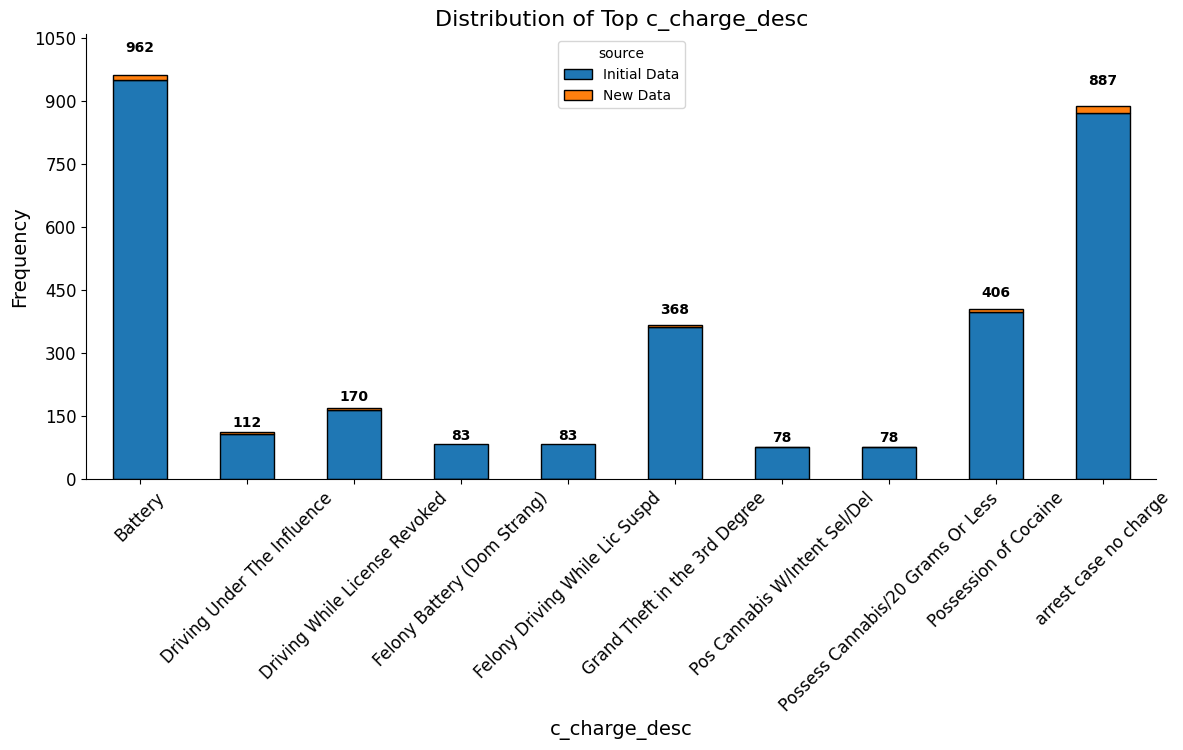

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Calculate frequency of each c_charge_desc
c_charge_desc_counts = combined_df['c_charge_desc'].value_counts()

# Sort c_charge_desc based on total counts
sorted_c_charge_desc = c_charge_desc_counts.index.tolist()

# Function to create stacked bar plot for top c_charge_desc by total counts
def plot_top_c_charge_desc(ax):
    # Filter data for these top c_charge_desc values
    filtered_df = combined_df[combined_df['c_charge_desc'].isin(sorted_c_charge_desc[:10])]  # Top 10 categories
    
    cross_tab = pd.crosstab(filtered_df['c_charge_desc'], filtered_df['source'], dropna=False)

    # Plotting setup
    bars = cross_tab.plot(kind='bar', stacked=True, ax=ax, edgecolor='black')
    ax.set_title('Distribution of Top c_charge_desc', fontsize=16)
    ax.set_xlabel('c_charge_desc', fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.xaxis.set_tick_params(rotation=45)  # Rotate x-axis labels

    # Add combined totals on top of each bar
    totals = cross_tab.sum(axis=1)
    for i, total in enumerate(totals):
        ax.text(i, total + total * 0.05, f'{total}', ha='center', va='bottom', fontsize=10, fontweight='bold')

    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Set more ticks on the y-axis
    ax.yaxis.set_major_locator(MaxNLocator(nbins=10))  # You can adjust nbins for more or fewer ticks

    # Adjust y-axis limit to ensure there's enough space for the labels
    ax.set_ylim(0, max(totals) * 1.1)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
plot_top_c_charge_desc(ax)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the top margin to make room for labels
plt.show()


/home/teresaramoos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/teresaramoos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/teresaramoos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/teresaramoos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

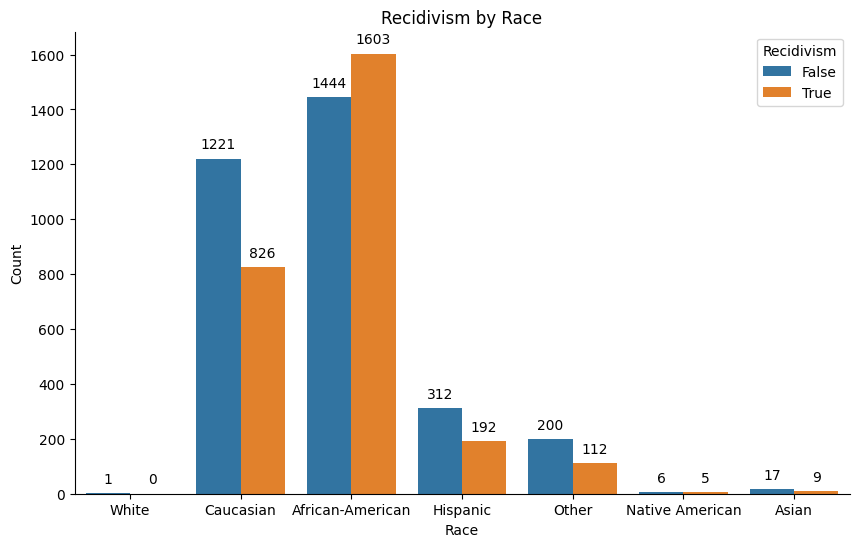

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure all sensitive feature columns have consistent types
combined_df['sex'] = combined_df['sex'].astype(str)
combined_df['race'] = combined_df['race'].astype(str)
combined_df['priors_count'] = combined_df['priors_count'].astype(int)

# Map races to 'Caucasian', 'African-American', and 'Other'
race_mapping = {
    'Caucasian': 'Caucasian',
    'African-American': 'African-American',
    'Hispanic': 'Other',
    'Asian': 'Other',
    'Native American': 'Other'
}
combined_df['race_n'] = combined_df['race'].map(race_mapping).fillna('Other')

# Define new race bins and labels
race_labels = combined_df['race'].unique()

# Plot race against recidivism without top and right borders
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=combined_df, x='race', hue='is_recid', linewidth=0)

# Add labels inside bars
for p in ax.patches:
    # Add annotation inside the bar, formatting height to integer
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Recidivism by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.legend(title='Recidivism')

# Remove top and right borders (spines)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()


/home/teresaramoos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/teresaramoos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/teresaramoos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/teresaramoos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

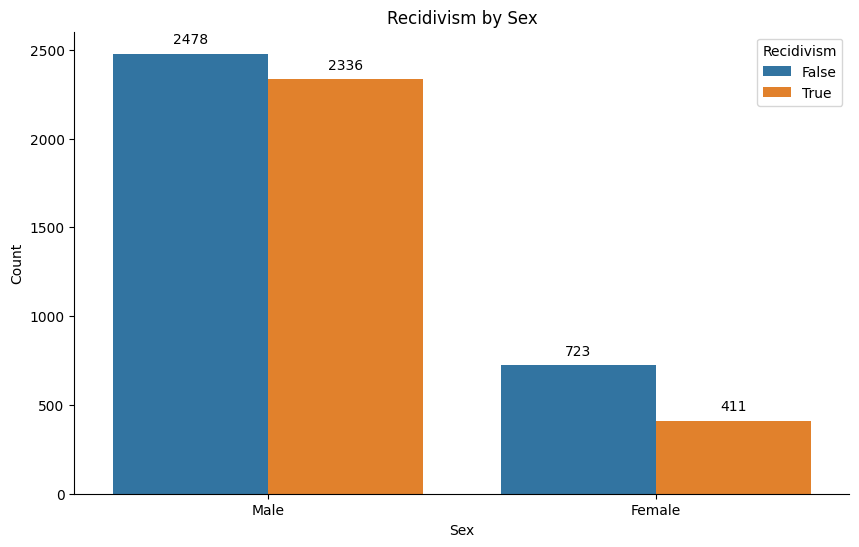

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming combined_df and age_labels are already defined

# Define new race bins and labels
race_labels = combined_df['sex'].unique()

# Plot race against recidivism without top and right borders
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=combined_df, x='sex', hue='is_recid', linewidth=0)

# Add labels inside bars
for p in ax.patches:
    # Add annotation inside the bar, formatting height to integer
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Recidivism by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Recidivism')

# Remove top and right borders (spines)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()


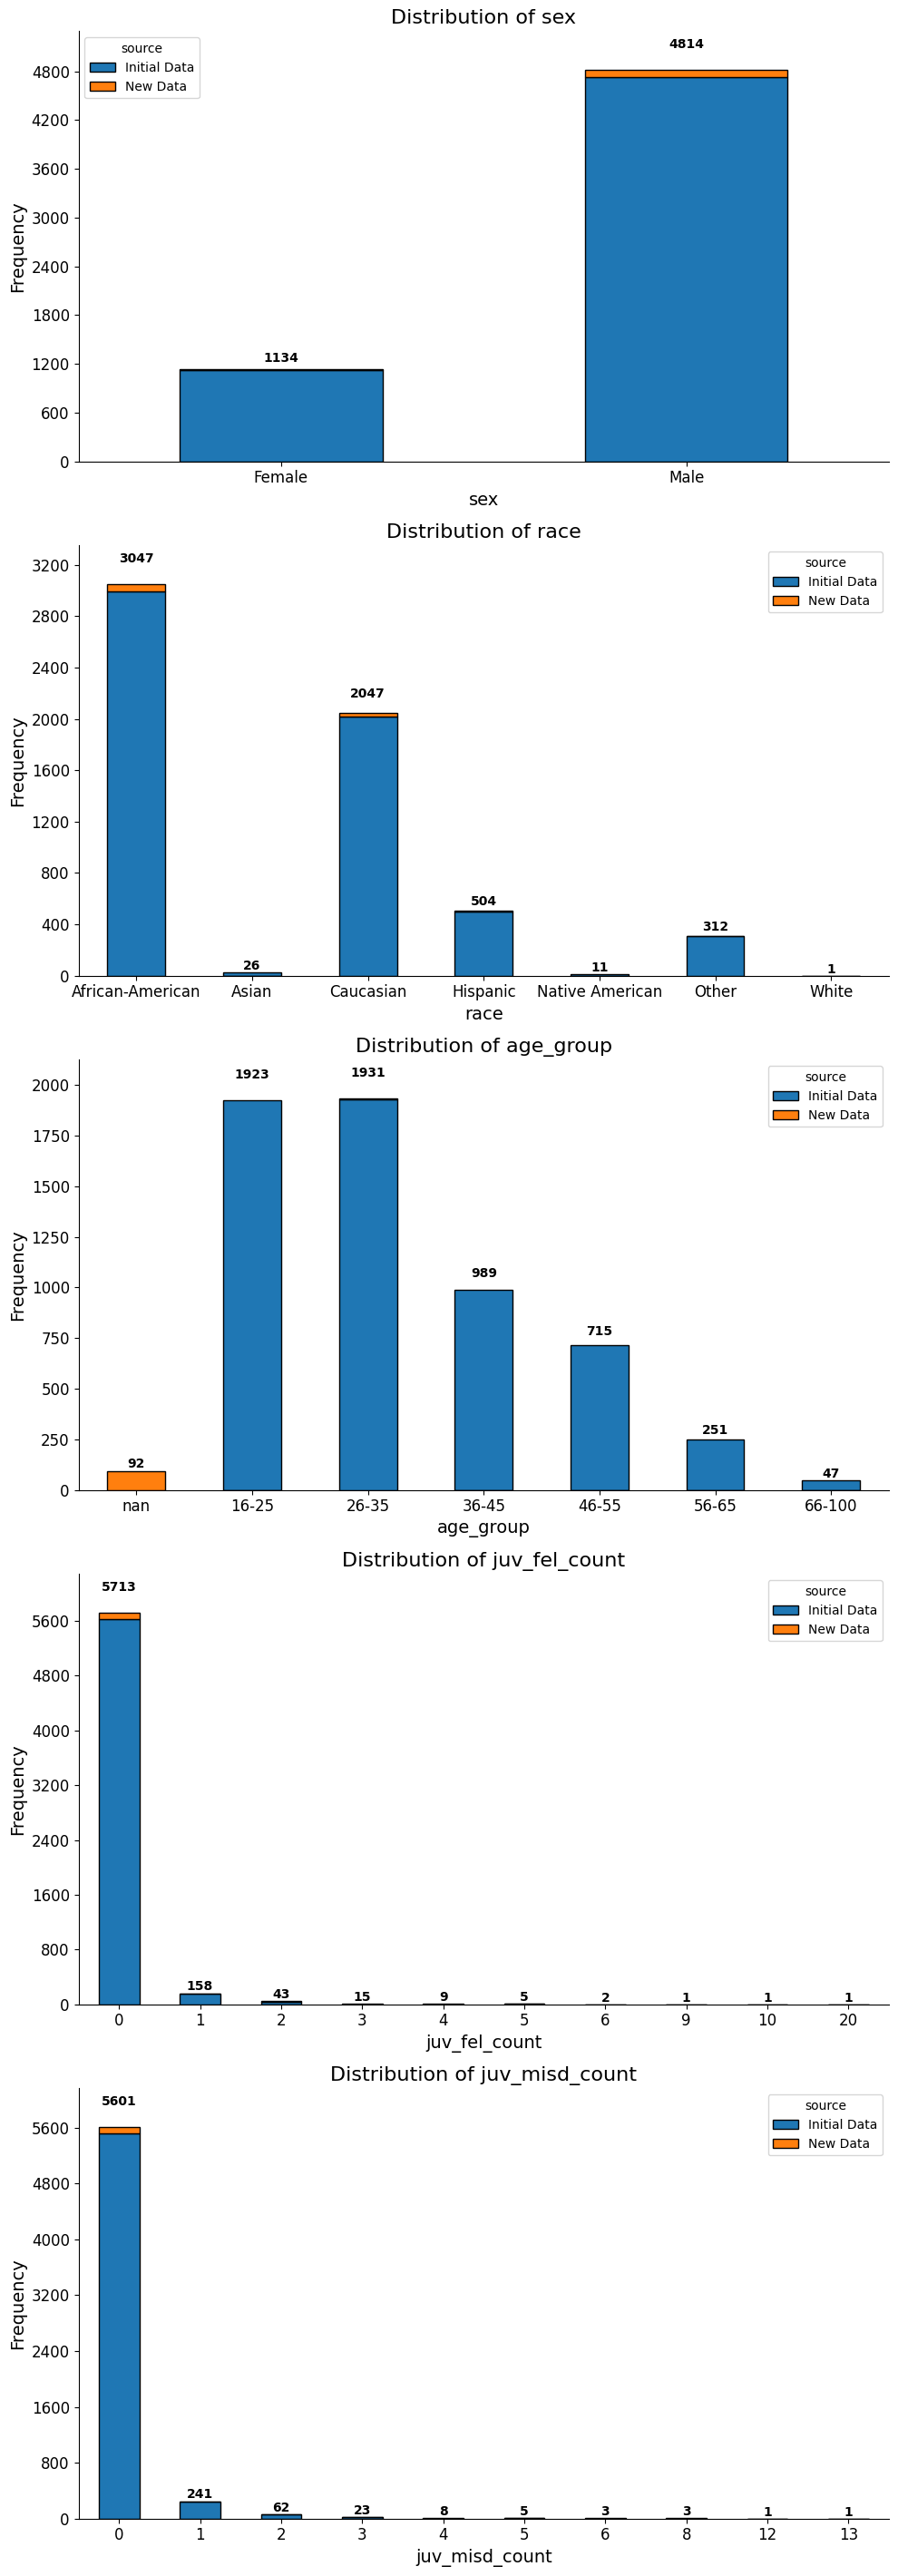

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Assuming combined_df is already defined with necessary columns

# Convert necessary columns to appropriate data types
combined_df['dob'] = pd.to_datetime(combined_df['dob'], errors='coerce')
combined_df['c_jail_in'] = pd.to_datetime(combined_df['c_jail_in'], errors='coerce')
combined_df['is_recid'] = combined_df['is_recid'].astype('bool')

# Calculate the sum of juvenile counts after converting them to numeric
combined_df['juv_fel_count'] = pd.to_numeric(combined_df['juv_fel_count'], errors='coerce')
combined_df['juv_misd_count'] = pd.to_numeric(combined_df['juv_misd_count'], errors='coerce')
combined_df['juv_other_count'] = pd.to_numeric(combined_df['juv_other_count'], errors='coerce')
combined_df['juv_total_count'] = combined_df[['juv_fel_count', 'juv_misd_count', 'juv_other_count']].sum(axis=1)

# Define bins for priors_count and juv_total_count
priors_bins = [0, 1, 2, 3, 5, float('inf')]  # Adjusted bins for priors_count
juv_total_bins = [0, 1, 2, 3, 5, float('inf')]  # Bins for sum of juvenile counts

labels_priors = ['0', '1', '2', '3-4', '5+']
labels_juv_total = ['0', '1', '2', '3-4', '5+']

combined_df['priors_count_bins'] = pd.cut(combined_df['priors_count'], bins=priors_bins, labels=labels_priors, right=False)
combined_df['juv_total_count_bins'] = pd.cut(combined_df['juv_total_count'], bins=juv_total_bins, labels=labels_juv_total, right=False)

# Generic function to create stacked bar plot for a given variable
def plot_variable(ax, variable, title):
    cross_tab = pd.crosstab(combined_df[variable], combined_df['source'], dropna=False)

    # Plotting setup
    bars = cross_tab.plot(kind='bar', stacked=True, ax=ax, edgecolor='black')
    ax.set_title(f'Distribution of {title}', fontsize=16)
    ax.set_xlabel(f'{title}', fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=12)
    for tick in ax.get_xticklabels():
        tick.set_rotation(0)  # Adjust rotation if needed

    # Add combined totals on top of each bar
    totals = cross_tab.sum(axis=1)
    for i, total in enumerate(totals):
        ax.text(i, total + total * 0.05, f'{total}', ha='center', va='bottom', fontsize=10, fontweight='bold')

    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Set more ticks on the y-axis
    ax.yaxis.set_major_locator(MaxNLocator(nbins=10))  # You can adjust nbins for more or fewer ticks

    # Adjust y-axis limit to ensure there's enough space for the labels
    ax.set_ylim(0, max(totals) * 1.1)

# Function to plot multiple variables
def plot_multiple_variables(variables, titles):
    n_vars = len(variables)
    fig, axs = plt.subplots(n_vars, 1, figsize=(10, 6 * n_vars))

    if n_vars == 1:
        plot_variable(axs, variables[0], titles[0])
    else:
        for ax, variable, title in zip(axs, variables, titles):
            plot_variable(ax, variable, title)

    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the top margin to make room for labels
    plt.show()

# Example usage
variables = ['sex', 'race', 'age_group','juv_fel_count','juv_misd_count']
#['priors_count_bins', 'juv_total_count_bins']  # Add other variables as needed


titles = ['sex', 'race', 'age_group','juv_fel_count','juv_misd_count']  # Corresponding titles for the variables

plot_multiple_variables(variables, titles)


/home/teresaramoos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/teresaramoos/.local/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/home/teresaramoos/.local/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


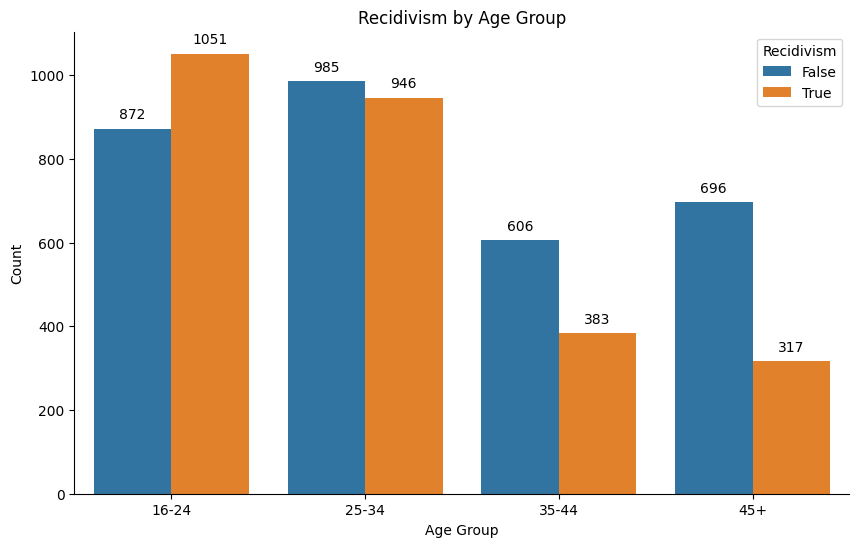

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming combined_df and age_labels are already defined

# Define new age bins and labels
age_bins = [16, 25, 35, 45, 100]
age_labels = ['16-24', '25-34', '35-44', '45+']
combined_df['age_bin'] = pd.cut(combined_df['age'], bins=age_bins, labels=age_labels, right=False)

# Plot age against recidivism without top and right borders
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=combined_df, x='age_bin', hue='is_recid', linewidth=0)

# Add labels inside bars
for p in ax.patches:
    # Add annotation inside the bar, formatting height to integer
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Recidivism by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Recidivism')

# Remove top and right borders (spines)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()


/home/teresaramoos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/teresaramoos/.local/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


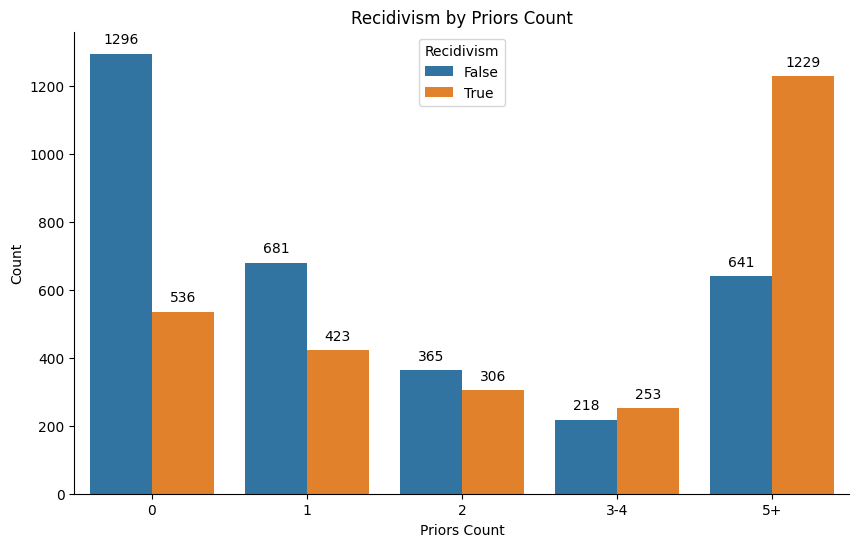

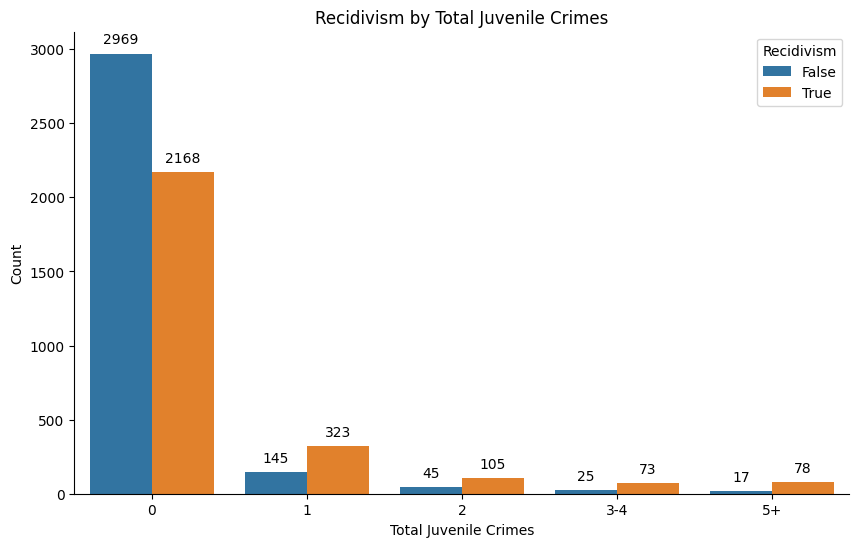

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming combined_df is already defined

# Define bins and labels for priors_count and juv_total_count
bins_priors = [0, 1, 2, 3,4, float('inf')]
labels_priors = ['0', '1', '2', '3-4', '5+']
bins_juv_total = [0, 1, 2, 3,4, float('inf')]
labels_juv_total = ['0', '1', '2', '3-4', '5+']

# Bin priors_count and juv_total_count
combined_df['priors_count_bin'] = pd.cut(combined_df['priors_count'], bins=bins_priors, labels=labels_priors, right=False)
combined_df['juv_total_count_bin'] = pd.cut(combined_df['juv_total_count'], bins=bins_juv_total, labels=labels_juv_total, right=False)

# Plot priors_count against recidivism without top and right borders
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=combined_df, x='priors_count_bin', hue='is_recid', hue_order=[False, True], order=labels_priors, linewidth=0)

# Add labels inside bars
for p in ax.patches:
    # Check if height is NaN
    if not pd.isna(p.get_height()):
        # Add annotation inside the bar, formatting height to integer
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Recidivism by Priors Count')
plt.xlabel('Priors Count')
plt.ylabel('Count')
plt.legend(title='Recidivism')

# Remove top and right borders (spines)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

# Plot juv_total_count against recidivism without top and right borders
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=combined_df, x='juv_total_count_bin', hue='is_recid', hue_order=[False, True], order=labels_juv_total, linewidth=0)

# Add labels inside bars
for p in ax.patches:
    # Check if height is NaN
    if not pd.isna(p.get_height()):
        # Add annotation inside the bar, formatting height to integer
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Recidivism by Total Juvenile Crimes')
plt.xlabel('Total Juvenile Crimes')
plt.ylabel('Count')
plt.legend(title='Recidivism')

# Remove top and right borders (spines)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()


/home/teresaramoos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/teresaramoos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/teresaramoos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


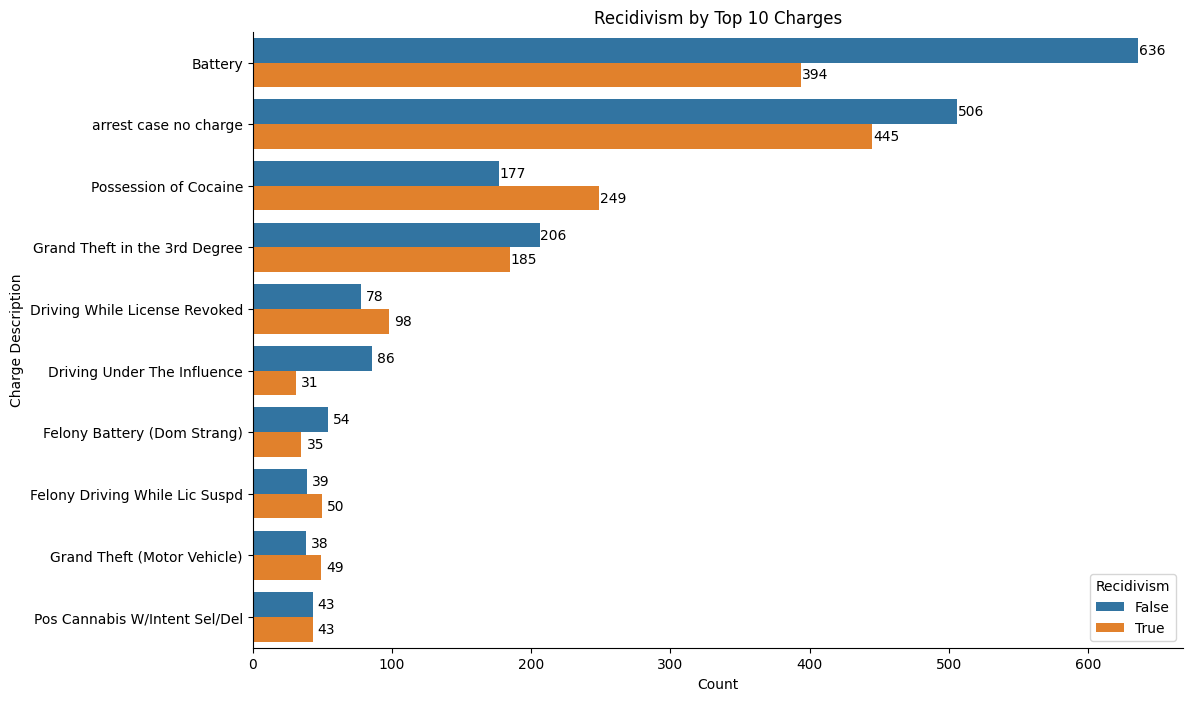

In [596]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming combined_df is already defined

# Get the top 10 most common c_charge_desc
top_10_charges = combined_df['c_charge_desc'].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 charges
filtered_df = combined_df[combined_df['c_charge_desc'].isin(top_10_charges)]

# Plot c_charge_desc against recidivism without top and right borders
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=filtered_df, y='c_charge_desc', hue='is_recid', linewidth=0, order=top_10_charges)

# Add labels inside bars
for p in ax.patches:
    # Check if height is NaN
    if not pd.isna(p.get_width()):
        # Add annotation inside the bar, formatting width to integer
        ax.annotate(f'{int(p.get_width())}', 
                    (p.get_width(), p.get_y() + p.get_height() / 2.), 
                    ha='center', va='center', xytext=(10, 0), textcoords='offset points')

plt.title('Recidivism by Top 10 Charges')
plt.xlabel('Count')
plt.ylabel('Charge Description')
plt.legend(title='Recidivism')

# Remove top and right borders (spines)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()


In [599]:
combined_df.to_csv('comb_df.csv', index=False)

## Recidivism

/tmp/ipykernel_2483/854034270.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['age_at_offense'] = (df_cleaned['new_offence_date'] - df_cleaned['dob']).dt.days / 365.25
/tmp/ipykernel_2483/854034270.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['age_group'] = pd.cut(df_cleaned['age_at_offense'], bins=bins, labels=labels, right=False)
/home/teresaramoos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be 

Chi-square test for age group and recidivism: p-value=1.1197549849796526e-39


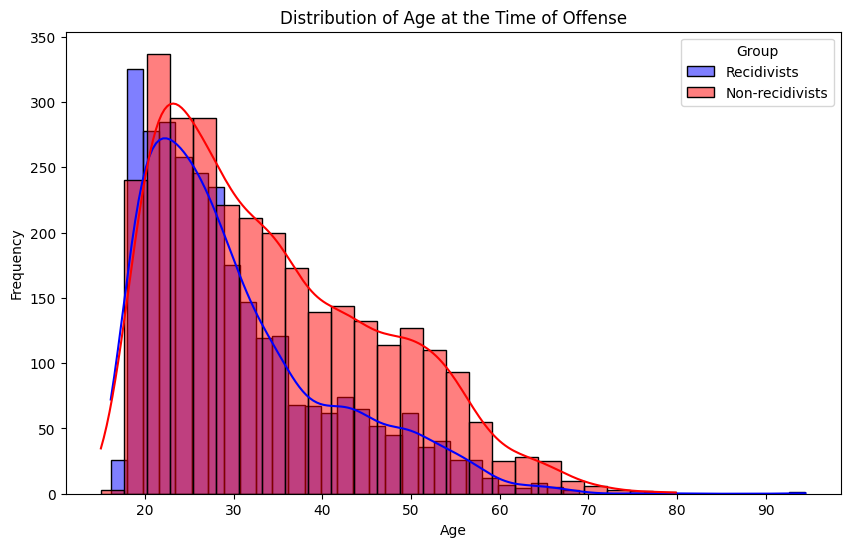

/home/teresaramoos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/teresaramoos/.local/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/home/teresaramoos/.local/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


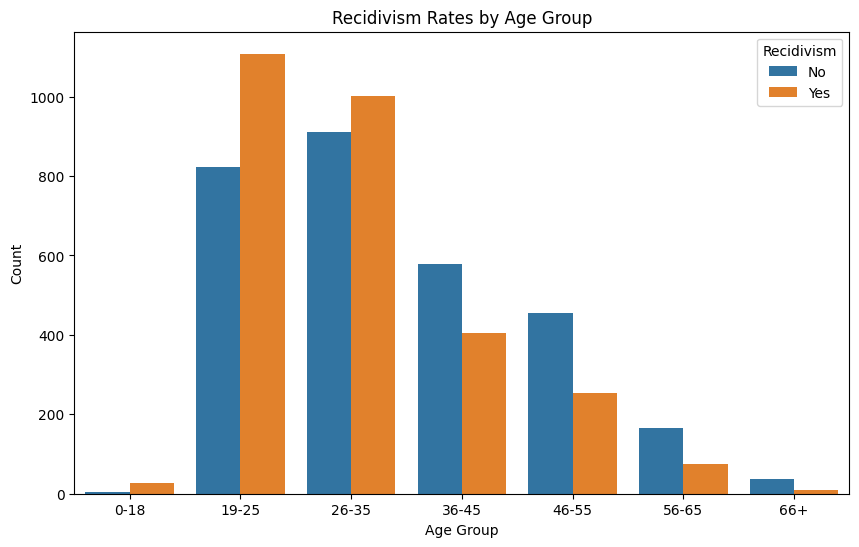

/home/teresaramoos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/teresaramoos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/teresaramoos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/teresaramoos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

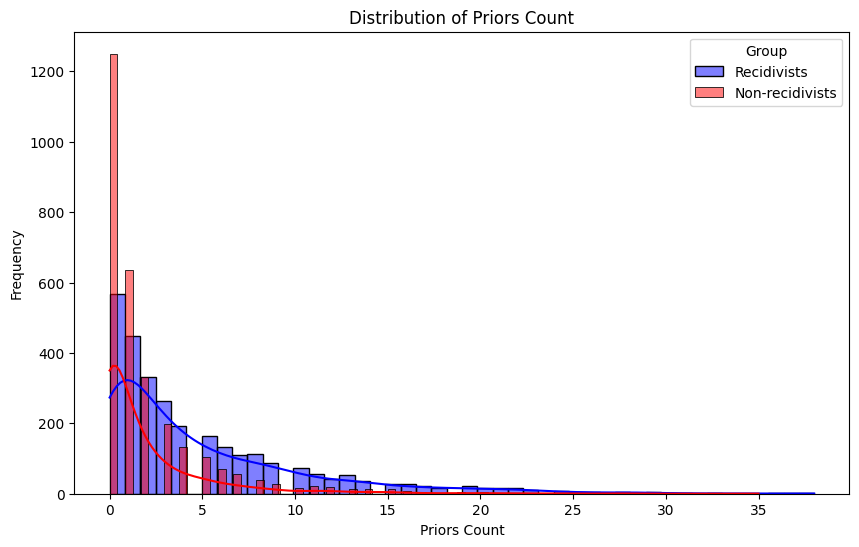

/home/teresaramoos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/teresaramoos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/teresaramoos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/teresaramoos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

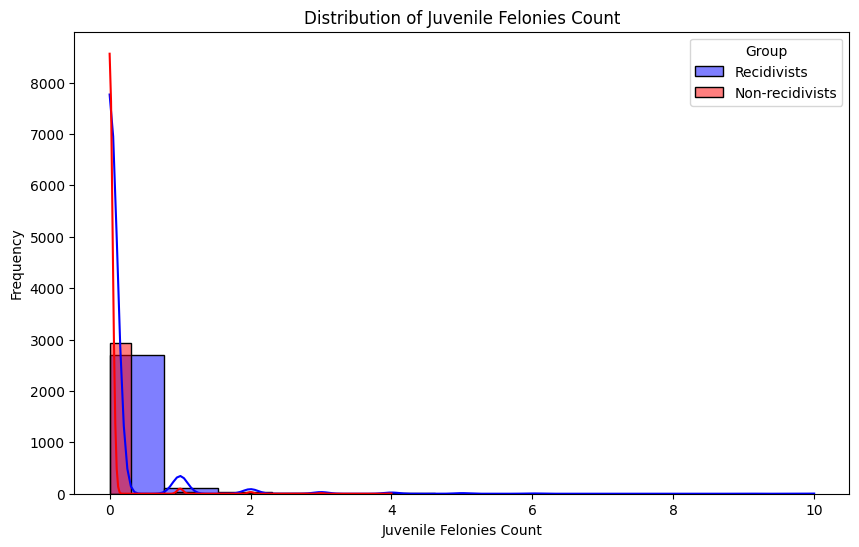

/home/teresaramoos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/teresaramoos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/teresaramoos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/teresaramoos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

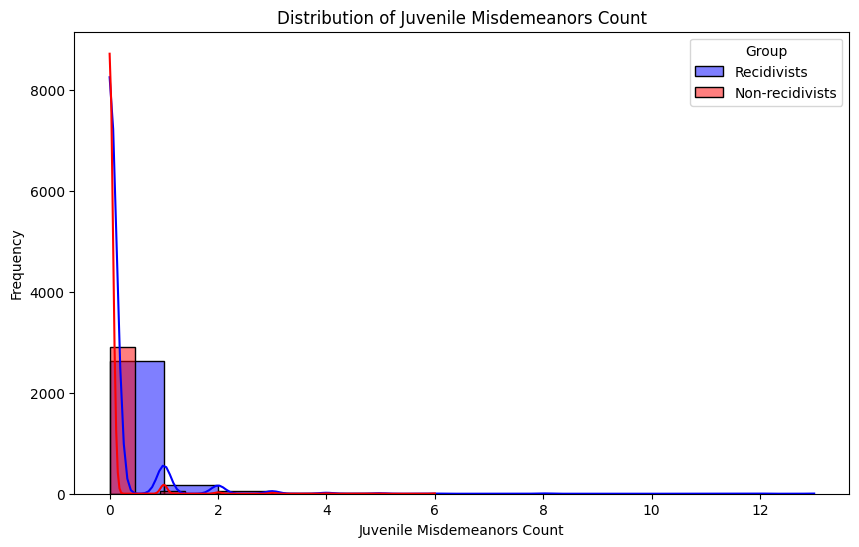

/home/teresaramoos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/teresaramoos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/teresaramoos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/teresaramoos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

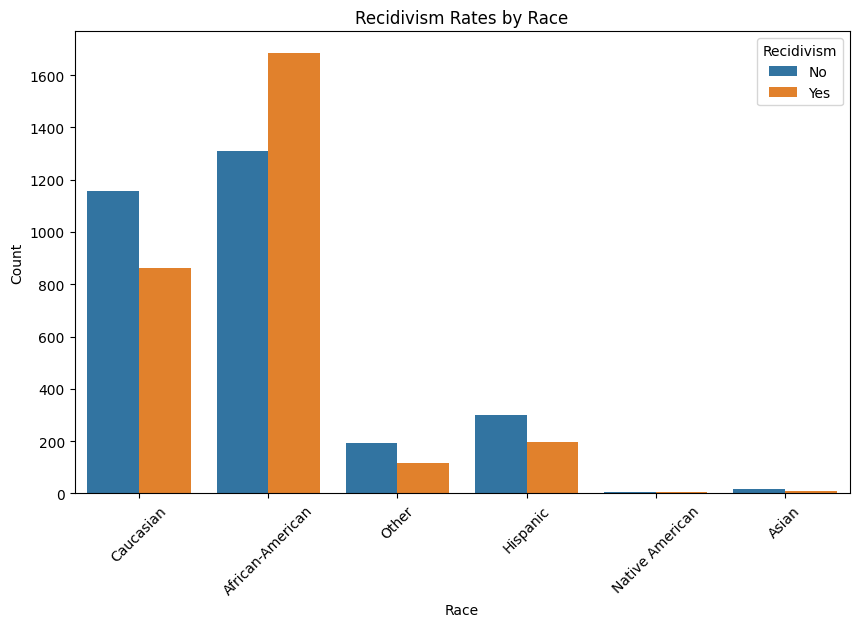

Chi-square test for race and recidivism: p-value=9.256224878062067e-26


/home/teresaramoos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/teresaramoos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/teresaramoos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/teresaramoos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

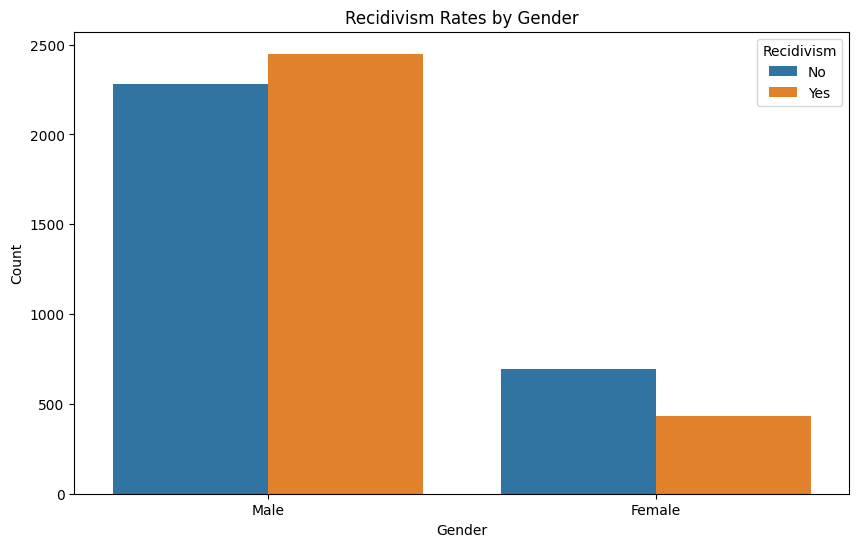

Chi-square test for gender and recidivism: p-value=4.797509150092753e-16


/home/teresaramoos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/teresaramoos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/teresaramoos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/teresaramoos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

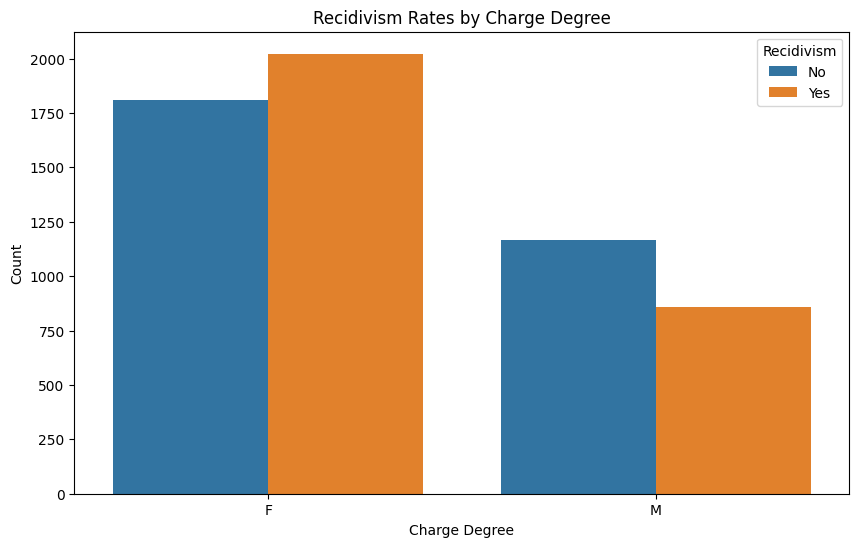

/home/teresaramoos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/teresaramoos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/teresaramoos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/teresaramoos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

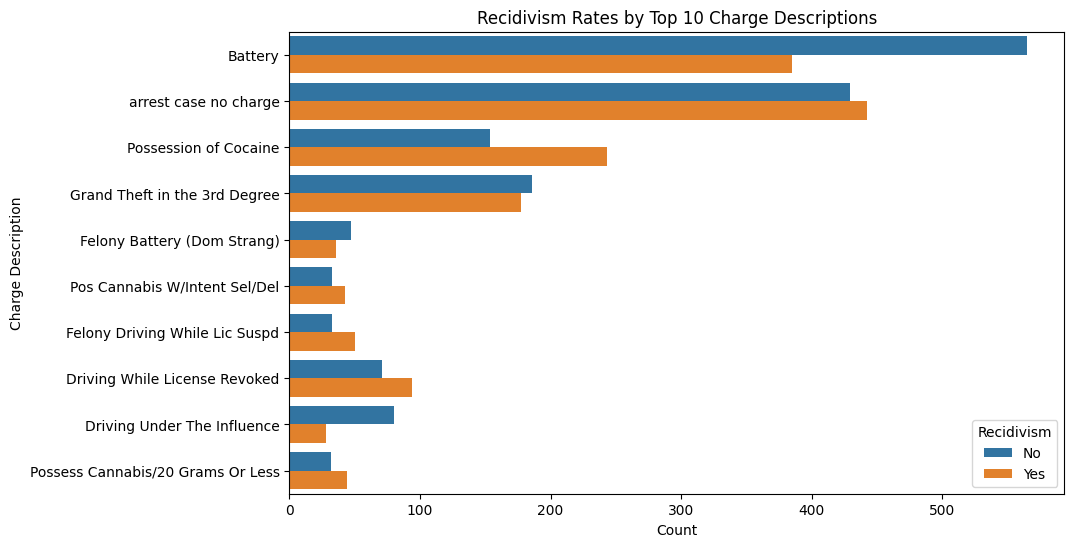

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from lifelines import KaplanMeierFitter



df['new_offence_date'] = df['c_offense_date'].fillna(df['c_arrest_date'])


# Convert dates to datetime
df['dob'] = pd.to_datetime(df['dob'])
df['new_offence_date'] = pd.to_datetime(df['new_offence_date'])
df['c_jail_in'] = pd.to_datetime(df['c_jail_in'])

# Keep only the relevant columns
required_columns = ['id', 'name', 'sex', 'dob', 'race', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count',
                    'c_case_number', 'c_charge_degree', 'c_charge_desc', 'new_offence_date','c_jail_in', 'is_recid']
df = df[required_columns]

df_cleaned=df
# 1. Characteristics of Recidivists

# Age at the time of offense

# Calculate age at the time of offense
df_cleaned['age_at_offense'] = (df_cleaned['new_offence_date'] - df_cleaned['dob']).dt.days / 365.25

# Bin the age variable into categories
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '66+']
df_cleaned['age_group'] = pd.cut(df_cleaned['age_at_offense'], bins=bins, labels=labels, right=False)

# Chi-square test for age group and recidivism
age_recid_crosstab = pd.crosstab(df_cleaned['age_group'], df_cleaned['is_recid'])
chi2, p, _, _ = chi2_contingency(age_recid_crosstab)
print(f'Chi-square test for age group and recidivism: p-value={p}')

# Plotting the distribution of age at the time of offense
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned[df_cleaned['is_recid'] == 1]['age_at_offense'], kde=True, color='blue', label='Recidivists')
sns.histplot(df_cleaned[df_cleaned['is_recid'] == 0]['age_at_offense'], kde=True, color='red', label='Non-recidivists')
plt.title('Distribution of Age at the Time of Offense')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title='Group')
plt.show()


# Recidivism Rates by Age Group
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', hue='is_recid', data=df_cleaned)
plt.title('Recidivism Rates by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Recidivism', labels=['No', 'Yes'])
plt.show()

# Priors count
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned[df_cleaned['is_recid'] == 1]['priors_count'], kde=True, color='blue', label='Recidivists')
sns.histplot(df_cleaned[df_cleaned['is_recid'] == 0]['priors_count'], kde=True, color='red', label='Non-recidivists')
plt.title('Distribution of Priors Count')
plt.xlabel('Priors Count')
plt.ylabel('Frequency')
plt.legend(title='Group')
plt.show()

# Juvenile felonies and misdemeanors
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned[df_cleaned['is_recid'] == 1]['juv_fel_count'], kde=True, color='blue', label='Recidivists')
sns.histplot(df_cleaned[df_cleaned['is_recid'] == 0]['juv_fel_count'], kde=True, color='red', label='Non-recidivists')
plt.title('Distribution of Juvenile Felonies Count')
plt.xlabel('Juvenile Felonies Count')
plt.ylabel('Frequency')
plt.legend(title='Group')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned[df_cleaned['is_recid'] == 1]['juv_misd_count'], kde=True, color='blue', label='Recidivists')
sns.histplot(df_cleaned[df_cleaned['is_recid'] == 0]['juv_misd_count'], kde=True, color='red', label='Non-recidivists')
plt.title('Distribution of Juvenile Misdemeanors Count')
plt.xlabel('Juvenile Misdemeanors Count')
plt.ylabel('Frequency')
plt.legend(title='Group')
plt.show()

# 2. Recidivism Rates by Race and Gender

# Race
plt.figure(figsize=(10, 6))
sns.countplot(x='race', hue='is_recid', data=df_cleaned)
plt.title('Recidivism Rates by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.legend(title='Recidivism', labels=['No', 'Yes'])
plt.xticks(ticks=range(len(df_cleaned['race'].unique())), labels=df_cleaned['race'].unique(), rotation=45)
plt.show()

# Chi-square test for race and recidivism
race_recid_crosstab = pd.crosstab(df_cleaned['race'], df_cleaned['is_recid'])
chi2, p, _, _ = chi2_contingency(race_recid_crosstab)
print(f'Chi-square test for race and recidivism: p-value={p}')

# Gender
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', hue='is_recid', data=df_cleaned)
plt.title('Recidivism Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Recidivism', labels=['No', 'Yes'])
plt.xticks(ticks=range(len(df_cleaned['sex'].unique())), labels=df_cleaned['sex'].unique())
plt.show()

# Chi-square test for gender and recidivism
gender_recid_crosstab = pd.crosstab(df_cleaned['sex'], df_cleaned['is_recid'])
chi2, p, _, _ = chi2_contingency(gender_recid_crosstab)
print(f'Chi-square test for gender and recidivism: p-value={p}')

# 3. Recidivism by Charge Degree and Description

# Charge degree
plt.figure(figsize=(10, 6))
sns.countplot(x='c_charge_degree', hue='is_recid', data=df_cleaned)
plt.title('Recidivism Rates by Charge Degree')
plt.xlabel('Charge Degree')
plt.ylabel('Count')
plt.legend(title='Recidivism', labels=['No', 'Yes'])
plt.xticks(ticks=range(len(df_cleaned['c_charge_degree'].unique())), labels=df_cleaned['c_charge_degree'].unique())
plt.show()

# Charge description
top_charge_desc = df_cleaned['c_charge_desc'].value_counts().index[:10]
plt.figure(figsize=(10, 6))
sns.countplot(y='c_charge_desc', hue='is_recid', data=df_cleaned[df_cleaned['c_charge_desc'].isin(top_charge_desc)])
plt.title('Recidivism Rates by Top 10 Charge Descriptions')
plt.xlabel('Count')
plt.ylabel('Charge Description')
plt.legend(title='Recidivism', labels=['No', 'Yes'])
plt.show()


##  Fairness

In [601]:
df=pd.read_csv('two-years-recid.csv')#.set_index('id')
df = df.dropna(subset=['c_jail_out'])

# Suppose df_test has some different values, so we'll modify it directly
# Convert columns to datetime if they are not already
df['c_jail_in'] = pd.to_datetime(df['c_jail_in'])
df['c_jail_out'] = pd.to_datetime(df['c_jail_out'])

df['r_offense_date'] = pd.to_datetime(df['r_offense_date'])


#df.drop(columns=['two_year_recid'], inplace=True)
### Clean dataset to target variable

# Calculate the difference between 'r_offense_date' and 'c_jail_out'
df['offense_jail_duration'] = (df['r_offense_date'] - df['c_jail_out']).dt.days

# Create a new column based on your conditions
df['two_year_recid'] = ((df['is_recid'] == 1) & (df['offense_jail_duration'] <= 365 * 2)).astype(int)

#
df['is_recid']=df['two_year_recid']
df

,id,name,sex,dob,age,race,c_jail_in,c_jail_out,c_case_number,c_offense_date,...,r_offense_date,r_charge_degree,r_charge_desc,is_violent_recid,vr_case_number,vr_offense_date,vr_charge_degree,vr_charge_desc,two_year_recid,offense_jail_duration
0,1,steven lux,Male,1953-06-15,62,Caucasian,2013-01-05 04:35:31,2013-01-07 03:18:03,13000208CF10A,2013-01-05,...,NaT,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN
1,2,andre small,Male,1987-10-01,28,African-American,2013-04-02 12:18:46,2013-04-04 07:54:22,13006354MM10A,2013-04-02,...,NaT,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN
2,3,willie gray,Male,1959-01-12,57,African-American,2014-10-31 12:02:01,2014-10-31 01:47:05,14040148MU10A,2014-10-30,...,2015-07-23,(M2),Driving License Suspended,0,NaN,NaN,NaN,NaN,1,264.0
3,4,nickson marcellus,Male,1996-07-11,19,African-American,2014-01-23 03:19:30,2014-01-23 01:04:34,13017969CF10A,NaN,...,2016-01-04,(M1),Possess Cannabis/20 Grams Or Less,0,NaN,NaN,NaN,NaN,1,710.0
4,5,patria barnes,Female,1978-06-06,37,Other,2013-12-08 01:55:28,2013-12-09 02:00:59,13022717MM10A,2013-12-07,...,NaT,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6109,6110,seccunda davis,Male,1987-05-13,28,African-American,2013-08-18 07:25:24,2013-08-19 09:01:42,13015644MM10A,2013-08-18,...,NaT,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN
6110,6111,mark montgomery,Male,1985-11-03,30,African-American,2013-03-23 01:32:34,2013-03-28 09:37:27,13005696MM10A,2013-03-23,...,NaT,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN
6111,6112,erica johnson,Female,1982-06-23,33,Caucasian,2013-09-29 09:25:30,2013-09-30 09:59:37,13013661CF10A,2013-09-29,...,NaT,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN
6112,6113,barry williams,Male,1988-04-22,27,African-American,2013-10-30 03:40:14,2013-12-07 01:53:45,13004112MM10A,NaN,...,NaT,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN


In [602]:
import pandas as pd
import numpy as np
from fairlearn.metrics import (
    demographic_parity_ratio, equalized_odds_ratio,
    true_positive_rate_difference, false_positive_rate_difference,
    selection_rate_difference
)
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure dob and c_jail_in are datetime
df['dob'] = pd.to_datetime(df['dob'])
df['c_jail_in'] = pd.to_datetime(df['c_jail_in'])

# Calculate age
df['age'] = df['c_jail_in'].dt.year - df['dob'].dt.year

# Map races to 'Caucasian', 'African-American', and 'Other'
race_mapping = {
    'Caucasian': 'Caucasian',
    'African-American': 'African-American',
    'Hispanic': 'Other',
    'Asian': 'Other',
    'Native American': 'Other'
}

df['race'] = df['race'].map(race_mapping).fillna('Other')

# Ensure all sensitive feature columns have consistent types
df['sex'] = df['sex'].astype(str)
df['race'] = df['race'].astype(str)
df['priors_count'] = df['priors_count'].astype(int)

# Define new age bins
age_bins = [16, 25, 35, 45, 96]
age_labels = ['16-24', '25-34', '35-44', '45+']
df['age_bin'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# Remove rows with NaN values in age_bin
df = df.dropna(subset=['age_bin'])

# Convert decile_score to binary prediction
df['will_recidivate'] = df['decile_score'] >= 5

# Create bins for priors_count
priors_bins = [0, 1, 2, 3, 5, float('inf')]
priors_labels = ['0', '1', '2', '3-4', '5+']
df['priors_count_bin'] = pd.cut(df['priors_count'], bins=priors_bins, labels=priors_labels, right=False, include_lowest=True)


# Function to calculate fairness metrics for a given feature
def calculate_fairness_metrics(df, feature, pred_column, true_label_column):
    df[feature] = df[feature].astype(str)  # Ensure the feature column is of type str
    metrics = {
        'Feature': feature,
        'Disparate Impact Ratio': demographic_parity_ratio(y_true=df[true_label_column], y_pred=df[pred_column], sensitive_features=df[feature]),
        'Equalized Odds Ratio': equalized_odds_ratio(y_true=df[true_label_column], y_pred=df[pred_column], sensitive_features=df[feature]),
        'TPR Difference': true_positive_rate_difference(y_true=df[true_label_column], y_pred=df[pred_column], sensitive_features=df[feature]),
        'FPR Difference': false_positive_rate_difference(y_true=df[true_label_column], y_pred=df[pred_column], sensitive_features=df[feature]),
        'Selection Rate Difference': selection_rate_difference(y_true=df[true_label_column], y_pred=df[pred_column], sensitive_features=df[feature])
    }
    return metrics

# Function to calculate disparate impact ratios by group for each sensitive feature
def calculate_disparate_impact(df, feature, pred_column, true_label_column):
    df[feature] = df[feature].astype(str)  # Ensure the feature column is of type str
    disparate_impact_ratios = {}
    overall_favorable_outcomes = df[pred_column].mean()
    for value in df[feature].unique():
        mask = df[feature] == value
        favorable_outcomes = df.loc[mask, pred_column].mean()
        if overall_favorable_outcomes == 0:
            disparate_impact_ratios[value] = np.nan
        else:
            disparate_impact_ratios[value] = favorable_outcomes / overall_favorable_outcomes
    return disparate_impact_ratios

# Create lists to store fairness metrics and disparate impact ratios
fairness_metrics_list = []
disparate_impact_list = []

# Features to check
features_to_check = ['sex', 'race', 'age_bin', 'priors_count_bin']

# Calculate fairness metrics for each feature
for feature in features_to_check:
    metrics = calculate_fairness_metrics(df, feature, 'will_recidivate', 'is_recid')
    fairness_metrics_list.append(metrics)

    # Calculate and store disparate impact ratios by group
    disparate_impact_by_group = calculate_disparate_impact(df, feature, 'will_recidivate', 'is_recid')
    for group, ratio in disparate_impact_by_group.items():
        disparate_impact_list.append({'Feature': feature, 'Group': group, 'Disparate Impact Ratio': ratio})

# Convert lists to DataFrames
fairness_metrics_df = pd.DataFrame(fairness_metrics_list)
disparate_impact_df = pd.DataFrame(disparate_impact_list)

# Display the DataFrames
print("Fairness Metrics:")
print(fairness_metrics_df)
print("\nDisparate Impact Ratios:")
print(disparate_impact_df)


Fairness Metrics:
            Feature  Disparate Impact Ratio  Equalized Odds Ratio  \
0               sex                0.909826              0.969298   
1              race                0.451885              0.419324   
2           age_bin                0.368240              0.273456   
3  priors_count_bin                0.342229              0.309398   

   TPR Difference  FPR Difference  Selection Rate Difference  
0        0.019409        0.006995                   0.041884  
1        0.318304        0.248686                   0.319046  
2        0.293276        0.365963                   0.395289  
3        0.404739        0.430050                   0.499557  

Disparate Impact Ratios:
             Feature             Group  Disparate Impact Ratio
0                sex              Male                1.017619
1                sex            Female                0.925856
2               race         Caucasian                0.769354
3               race  African-American     

In [62]:
import pandas as pd
import numpy as np
from fairlearn.metrics import (
    demographic_parity_ratio, equalized_odds_ratio,
    true_positive_rate_difference, false_positive_rate_difference,
    selection_rate_difference
)

# Ensure all sensitive feature columns have consistent types
df['sex'] = df['sex'].astype(str)
df['race'] = df['race'].astype(str)
df['priors_count'] = df['priors_count'].astype(int)

# Define new age bins
age_bins = [16, 25, 35, 45, 96]
age_labels = ['16-24', '25-34', '35-44', '45+']
df['age_bin'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# Convert decile_score to binary prediction
df['will_recidivate'] = df['decile_score'] >= 5

# Function to calculate fairness metrics for a given feature
def calculate_fairness_metrics(df, feature, pred_column, true_label_column):
    df[feature] = df[feature].astype(str)  # Ensure the feature column is of type str
    metrics = {
        'Feature': feature,
        'Disparate Impact Ratio': demographic_parity_ratio(y_true=df[true_label_column], y_pred=df[pred_column], sensitive_features=df[feature]),
        'Equalized Odds Ratio': equalized_odds_ratio(y_true=df[true_label_column], y_pred=df[pred_column], sensitive_features=df[feature]),
        'TPR Difference': true_positive_rate_difference(y_true=df[true_label_column], y_pred=df[pred_column], sensitive_features=df[feature]),
        'FPR Difference': false_positive_rate_difference(y_true=df[true_label_column], y_pred=df[pred_column], sensitive_features=df[feature]),
        'Selection Rate Difference': selection_rate_difference(y_true=df[true_label_column], y_pred=df[pred_column], sensitive_features=df[feature])
    }
    return metrics

# Function to calculate disparate impact ratios by group for each sensitive feature
def calculate_disparate_impact(df, feature, pred_column, true_label_column):
    df[feature] = df[feature].astype(str)  # Ensure the feature column is of type str
    disparate_impact_ratios = {}
    overall_favorable_outcomes = df[pred_column].mean()
    for value in df[feature].unique():
        mask = df[feature] == value
        favorable_outcomes = df.loc[mask, pred_column].mean()
        if overall_favorable_outcomes == 0:
            disparate_impact_ratios[value] = np.nan
        else:
            disparate_impact_ratios[value] = favorable_outcomes / overall_favorable_outcomes
    return disparate_impact_ratios

# Create lists to store fairness metrics and disparate impact ratios
fairness_metrics_list = []
disparate_impact_list = []

# Features to check
features_to_check = ['sex', 'race', 'age_bin', 'priors_count']

# Calculate fairness metrics for each feature
for feature in features_to_check:
    metrics = calculate_fairness_metrics(df, feature, 'will_recidivate', 'is_recid')
    fairness_metrics_list.append(metrics)

    # Calculate and store disparate impact ratios by group
    disparate_impact_by_group = calculate_disparate_impact(df, feature, 'will_recidivate', 'is_recid')
    for group, ratio in disparate_impact_by_group.items():
        disparate_impact_list.append({'Feature': feature, 'Group': group, 'Disparate Impact Ratio': ratio})

# Convert lists to DataFrames
fairness_metrics_df = pd.DataFrame(fairness_metrics_list)
disparate_impact_df = pd.DataFrame(disparate_impact_list)

# Display the DataFrames
print("Fairness Metrics:")
print(fairness_metrics_df)
print("\nDisparate Impact Ratios:")
print(disparate_impact_df)


Fairness Metrics:
        Feature  Disparate Impact Ratio  Equalized Odds Ratio  TPR Difference  \
0           sex                0.909826              0.960118        0.012300   
1          race                0.271440              0.000000        0.683761   
2       age_bin                0.361509              0.273636        0.317687   
3  priors_count                0.259912              0.000000        1.000000   

   FPR Difference  Selection Rate Difference  
0        0.012183                   0.041884  
1        0.416667                   0.529862  
2        0.345203                   0.395778  
3        1.000000                   0.740088  

Disparate Impact Ratios:
         Feature             Group  Disparate Impact Ratio
0            sex              Male                1.017619
1            sex            Female                0.925856
2           race         Caucasian                0.769354
3           race  African-American                1.275260
4           race    

<Figure size 1200x600 with 0 Axes>

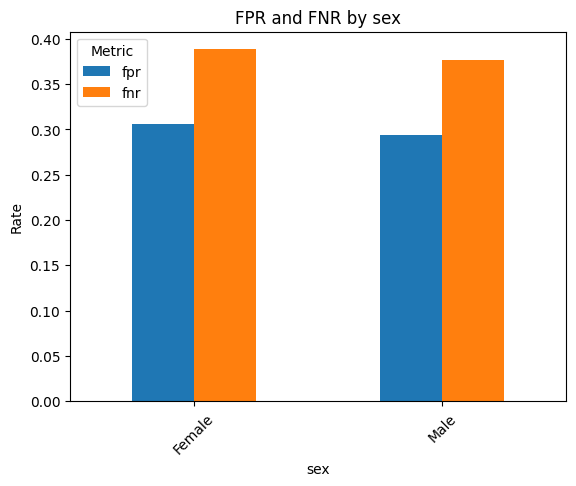

<Figure size 1200x600 with 0 Axes>

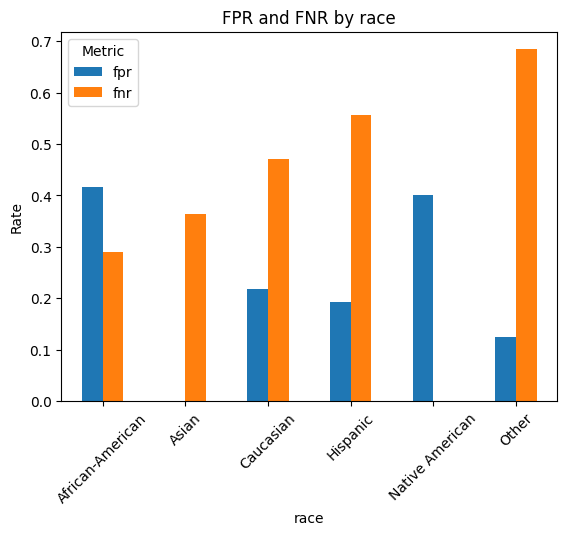

<Figure size 1200x600 with 0 Axes>

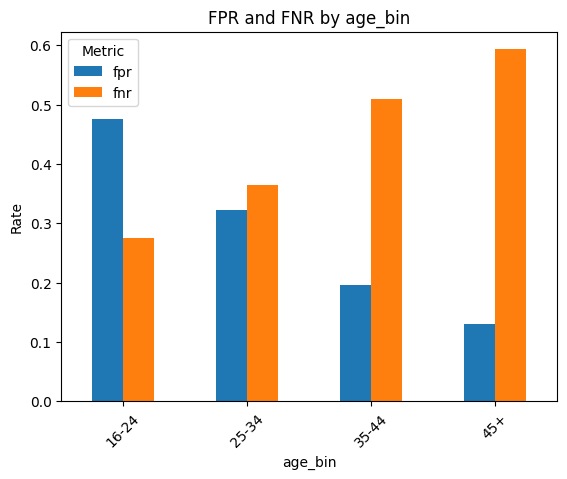

<Figure size 1200x600 with 0 Axes>

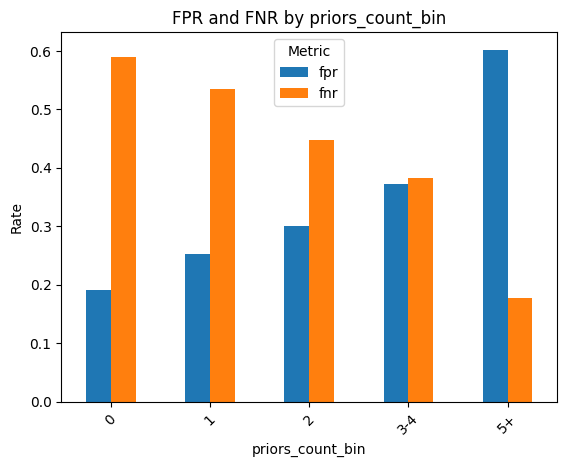

In [63]:
from fairlearn.metrics import MetricFrame, false_positive_rate, false_negative_rate


# Convert necessary columns to appropriate data types
df['sex'] = df['sex'].astype(str)
df['race'] = df['race'].astype(str)
df['priors_count'] = df['priors_count'].astype(int)
df['is_recid'] = df['is_recid'].astype(int)

# Create bins for age
age_bins = [16, 25, 35, 45, 96]
age_labels = ['16-24', '25-34', '35-44', '45+']
df['age_bin'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# Create bins for priors_count
priors_count_bins = [-0.1, 0, 1, 2, 4, float('inf')]
priors_count_labels = ['0', '1', '2', '3-4', '5+']
df['priors_count_bin'] = pd.cut(df['priors_count'], bins=priors_count_bins, labels=priors_count_labels)

# Convert decile_score to will_recidivate
df['will_recidivate'] = df['decile_score'] >= 5
df['will_recidivate'] = df['will_recidivate'].astype(int)  # Convert boolean to int

# Function to calculate FPR and FNR for each subgroup within a feature
def calculate_fpr_fnr_by_group(df, feature, pred_column, true_label_column):
    metric_frame = MetricFrame(metrics={'fpr': false_positive_rate, 'fnr': false_negative_rate},
                               y_true=df[true_label_column], y_pred=df[pred_column], sensitive_features=df[feature])
    return metric_frame.by_group

# List of features to analyze
features_to_check = ['sex', 'race', 'age_bin', 'priors_count_bin']

# Calculate and plot FPR and FNR for each group within each feature
for feature in features_to_check:
    metrics_by_group = calculate_fpr_fnr_by_group(df, feature, 'will_recidivate', 'is_recid')
    
    # Plotting FPR and FNR for each group within the feature
    plt.figure(figsize=(12, 6))
    metrics_by_group.plot(kind='bar')
    plt.title(f'FPR and FNR by {feature}')
    plt.ylabel('Rate')
    plt.xlabel(feature)
    plt.xticks(rotation=45)
    plt.legend(title='Metric')
    plt.show()

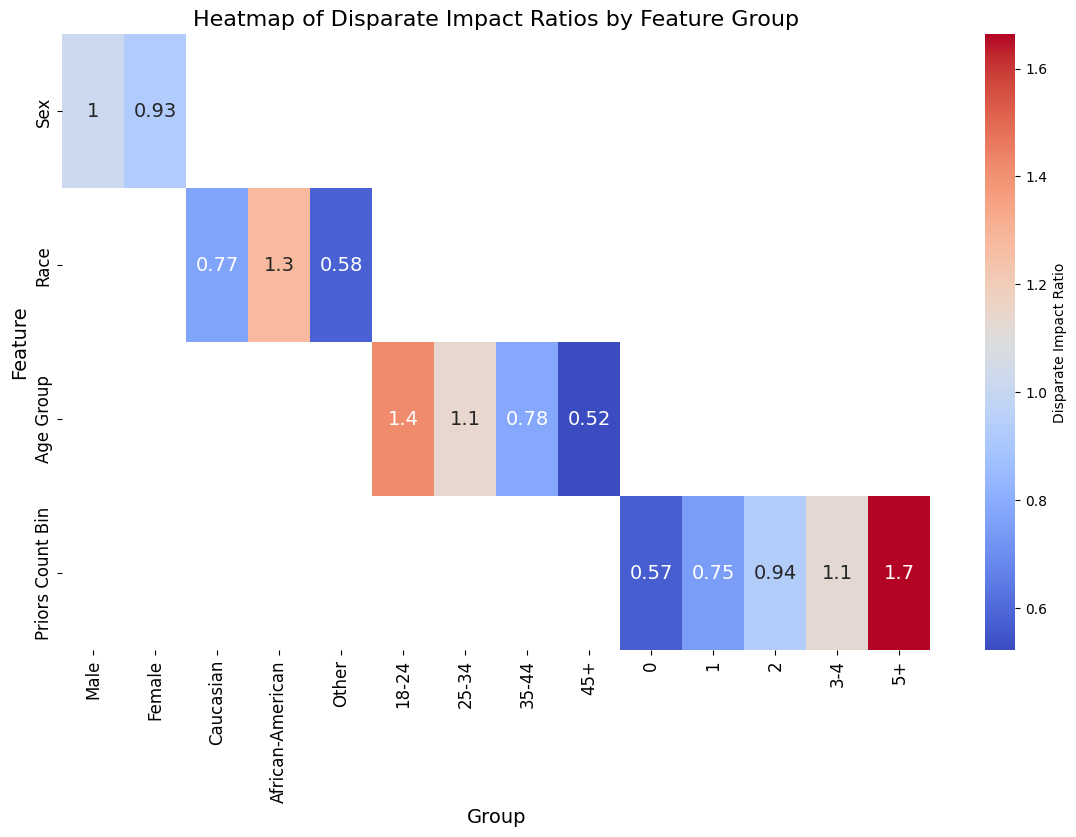

In [557]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data
disparate_impact_df = pd.DataFrame({
    'Feature': ['Sex', 'Sex', 'Race', 'Race', 'Race', 'Age Group', 'Age Group', 'Age Group', 'Age Group', 'Priors Count Bin', 'Priors Count Bin', 'Priors Count Bin', 'Priors Count Bin', 'Priors Count Bin'],
    'Group': ['Male', 'Female', 'Caucasian', 'African-American', 'Other', '45+', '25-34', '16-24', '35-44', '0', '1', '5+', '3-4', '2'],
    'Disparate Impact Ratio': [1.017660, 0.925698, 0.769223, 1.275042, 0.576856, 0.521546, 1.141373, 1.415129, 0.780925, 0.569335, 0.747678, 1.663611, 1.127337, 0.935007]
})

# Define the order for the features and groups
feature_order = ['Sex', 'Race', 'Age Group', 'Priors Count Bin']
group_order = ['Male', 'Female', 'Caucasian', 'African-American', 'Other', '16-24', '25-34', '35-44', '45+', '0', '1', '2', '3-4', '5+']

# Pivot table for heatmap with ordered index and columns
disparate_impact_pivot = disparate_impact_df.pivot(index='Feature', columns='Group', values='Disparate Impact Ratio')
disparate_impact_pivot = disparate_impact_pivot.reindex(index=feature_order, columns=group_order)

# Plotting heatmap with larger text
plt.figure(figsize=(14, 8))
sns.heatmap(disparate_impact_pivot, annot=True, cmap='coolwarm', cbar_kws={'label': 'Disparate Impact Ratio'}, annot_kws={'size': 14})
plt.title('Heatmap of Disparate Impact Ratios by Feature Group', fontsize=16)
plt.xlabel('Group', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [65]:
### ROC

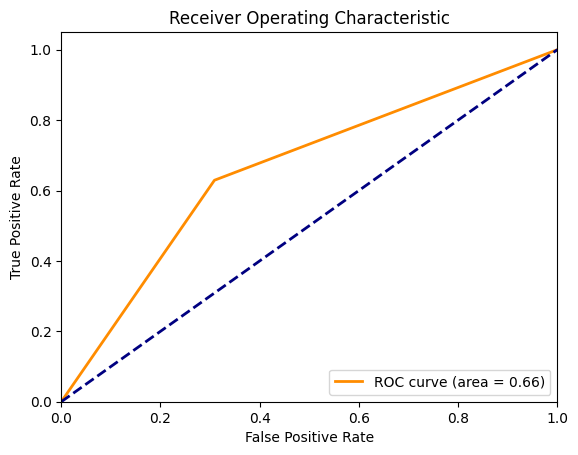

COMPAS ROC AUC: 0.66


In [558]:
import pandas as pd
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

# Assuming `df` is your COMPAS dataset DataFrame
# Example of loading the COMPAS dataset
# df = pd.read_csv('compas-scores.csv')

# Extract COMPAS score and actual labels
# Replace 'decile_score' with the actual column name for COMPAS scores in your dataset
# Replace 'is_recid' with the actual column name for the actual labels in your dataset
compas_scores = df['decile_score']
actual_labels = df['is_recid']

# Convert COMPAS scores to binary predictions based on the condition decile_score >= 1
predicted_labels = (compas_scores >= 5).astype(int)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(actual_labels, predicted_labels)

# Calculate AUC
roc_auc = roc_auc_score(actual_labels, predicted_labels)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print(f'COMPAS ROC AUC: {roc_auc:.2f}')


## Other Graphs

The dataset contains information on recidivism, including demographics, criminal history, and recidivism scores.
The dataset contains 6114 records and 35 features.
               age  juv_fel_count  juv_misd_count  juv_other_count  \
count  5854.000000    6114.000000     6114.000000      6114.000000   
mean     32.066279       0.062643        0.090939         0.104351   
std      11.686098       0.396906        0.486264         0.448095   
min      16.000000       0.000000        0.000000         0.000000   
25%      23.000000       0.000000        0.000000         0.000000   
50%      29.000000       0.000000        0.000000         0.000000   
75%      39.750000       0.000000        0.000000         0.000000   
max      94.000000      10.000000       13.000000         9.000000   

       priors_count  decile_score  v_decile_score  
count   6114.000000   6114.000000     6114.000000  
mean       3.438502      4.488878        3.688584  
std        4.858464      2.849050        2.503754

/home/teresaramoos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/teresaramoos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/teresaramoos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/teresaramoos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

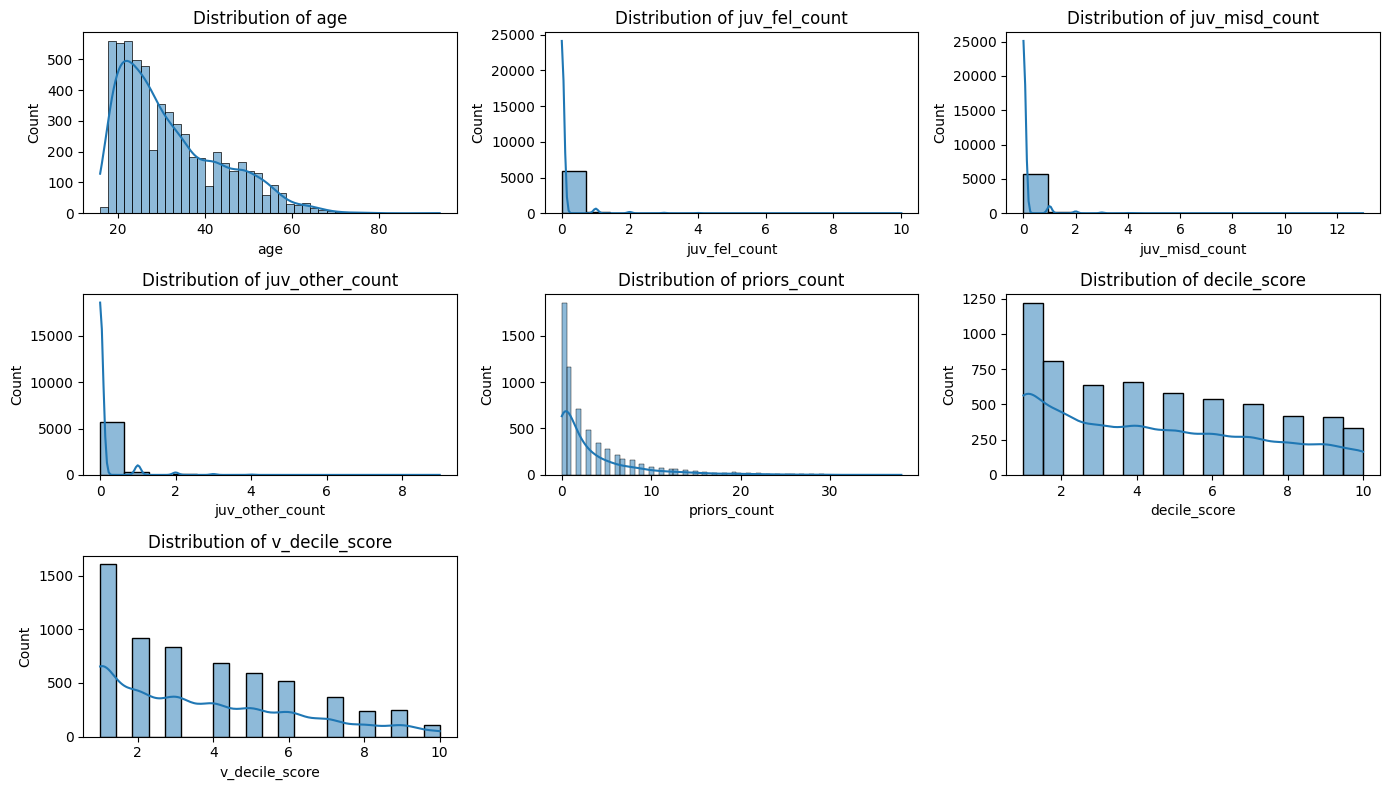

/home/teresaramoos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/teresaramoos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/teresaramoos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


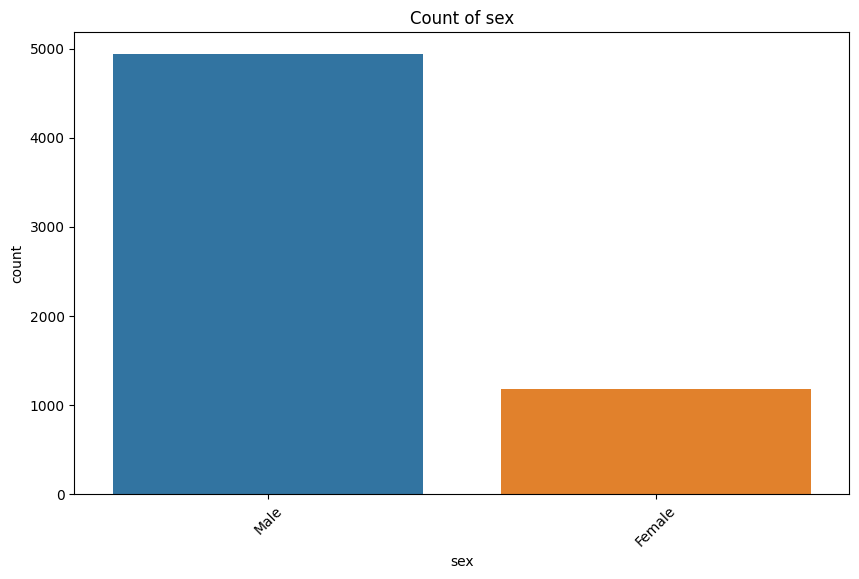

/home/teresaramoos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/teresaramoos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/teresaramoos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


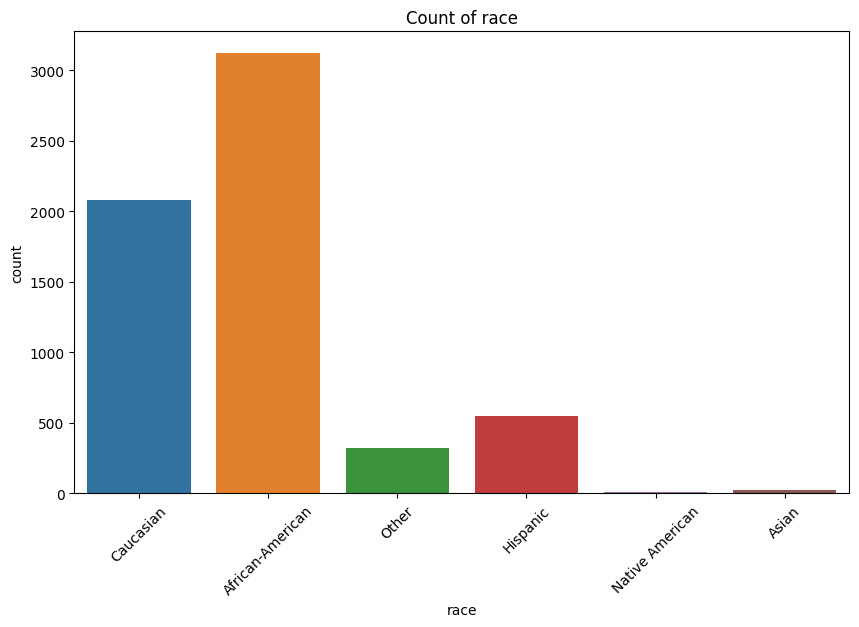

/home/teresaramoos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/teresaramoos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/teresaramoos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


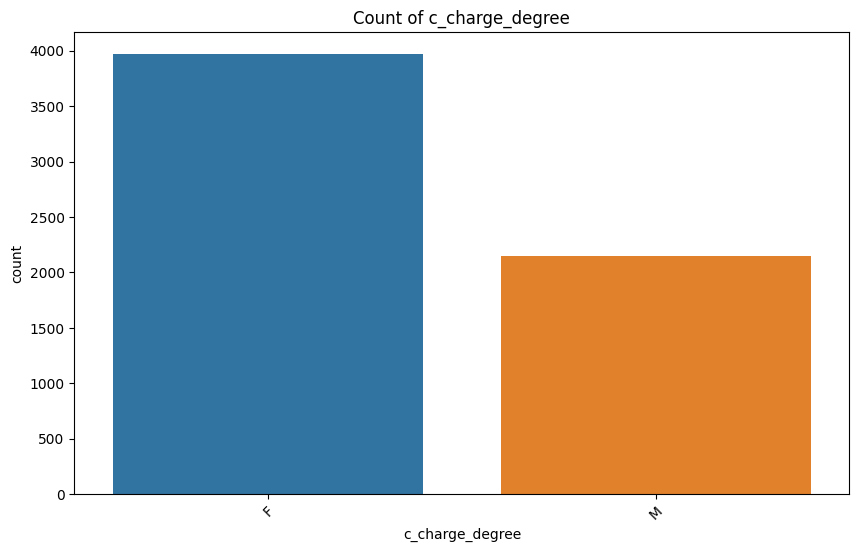

/home/teresaramoos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/teresaramoos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/teresaramoos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


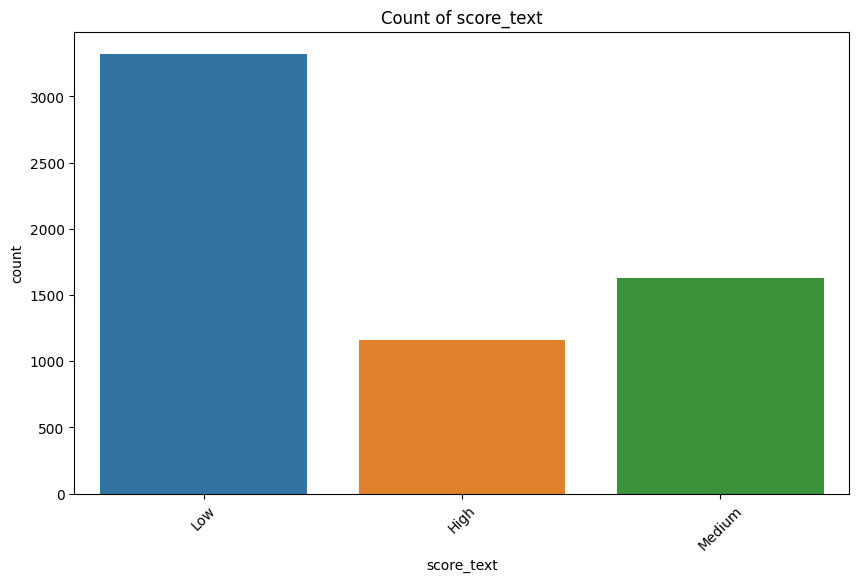

/home/teresaramoos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/teresaramoos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/teresaramoos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


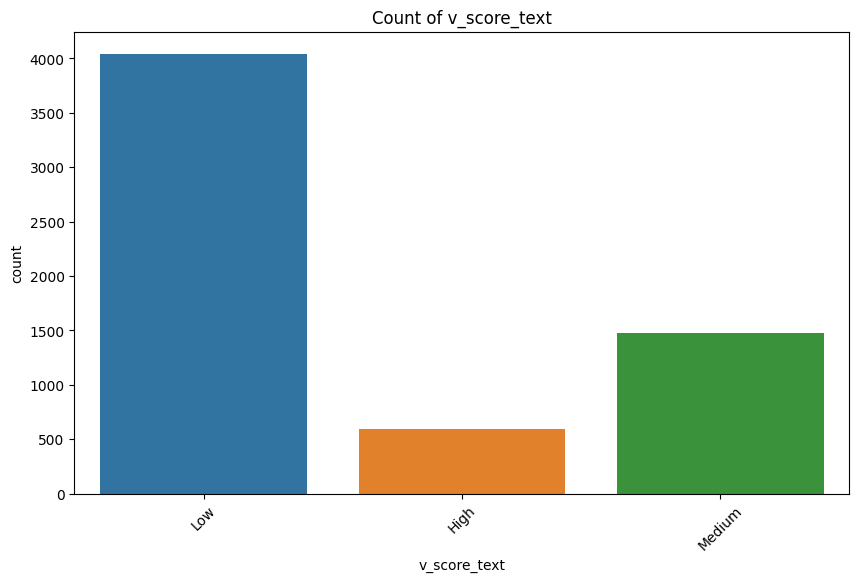

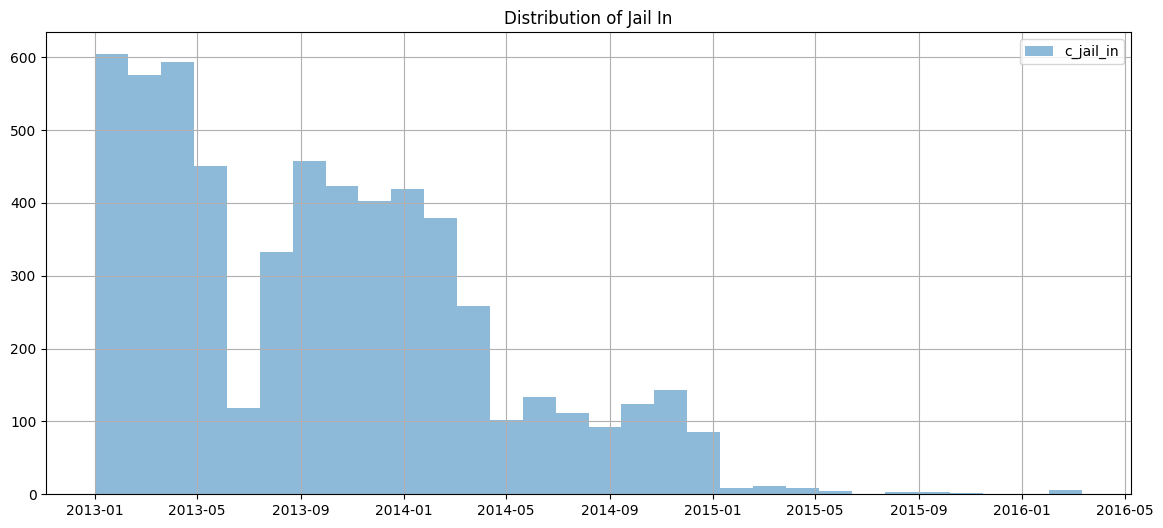

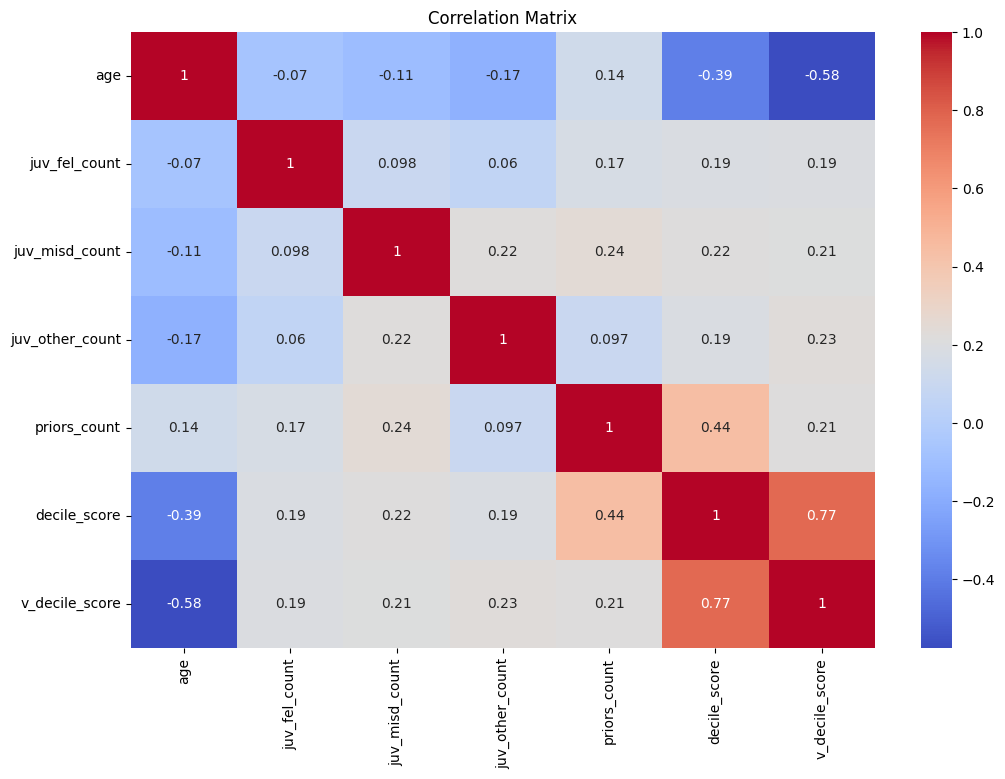

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('two-years-recid.csv')#.set_index('id')

# Convert dates to datetime
df['c_jail_in'] = pd.to_datetime(df['c_jail_in'])
df['dob'] = pd.to_datetime(df['dob'])
df['c_arrest_date'] = pd.to_datetime(df['c_arrest_date'])
df['c_offense_date'] = pd.to_datetime(df['c_offense_date'])
df['age'] = (df['c_jail_in'] - df['dob']).dt.days // 365


# 1. Introduction to the Dataset
print("The dataset contains information on recidivism, including demographics, criminal history, and recidivism scores.")

# 2. Data Overview
print(f"The dataset contains {df.shape[0]} records and {df.shape[1]} features.")

# 3. Descriptive Statistics
numerical_features = ['age', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count', 'decile_score', 'v_decile_score']
print(df[numerical_features].describe())

# Visualizations for numerical features
plt.figure(figsize=(14, 8))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# 4. Categorical Data Analysis
categorical_features = ['sex', 'race', 'c_charge_degree', 'score_text', 'v_score_text']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=feature)
    plt.title(f'Count of {feature}')
    plt.xticks(rotation=45)
    plt.show()

# 5. Date Features Analysis
plt.figure(figsize=(14, 6))
df['c_jail_in'].hist(bins=30, alpha=0.5, label='c_jail_in')
plt.legend()
plt.title('Distribution of Jail In')
plt.show()

# 6. Correlation Analysis
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


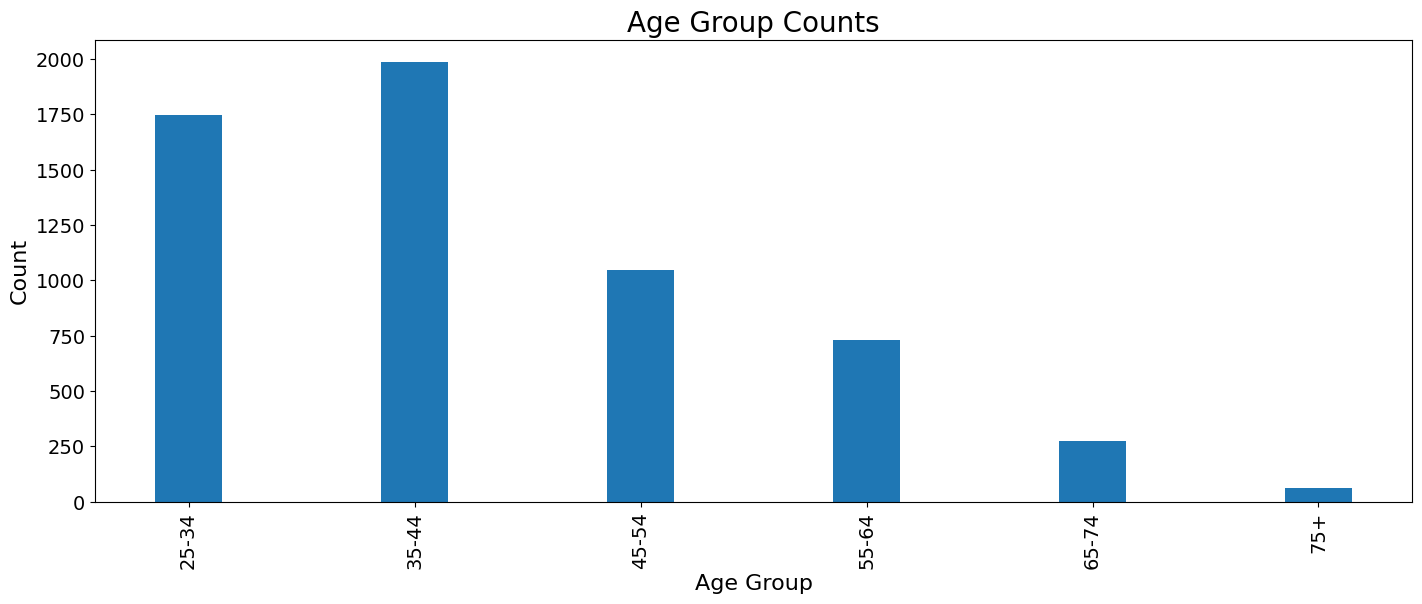

In [366]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame
# df = pd.read_csv('your_data.csv')

# Convert 'dob' to datetime and calculate age
df['dob'] = pd.to_datetime(df['dob'])
df['age_birth'] = (pd.to_datetime('today') - df['dob']).dt.days // 365

# Define age bins and labels, starting at 25
age_bins = [25, 35, 45, 55, 65, 75, 100]
age_labels = ['25-34', '35-44', '45-54', '55-64', '65-74', '75+']

# Create age categories
df['age_group'] = pd.cut(df['age_birth'], bins=age_bins, labels=age_labels, right=False)

# Get counts for each age group
age_group_counts = df['age_group'].value_counts().sort_index()

# Plot the counts for each age group with larger text
plt.figure(figsize=(17, 6))
plt.title('Age Group Counts', fontsize=20)
plt.xlabel('Age Group', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.bar(age_group_counts.index, age_group_counts.values, width=0.3)
plt.xticks(rotation='vertical', fontsize=14)
plt.yticks(fontsize=14)
plt.show()


/tmp/ipykernel_4951/1652332024.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['c_offense_date'] = pd.to_datetime(df['c_offense_date'])
/tmp/ipykernel_4951/1652332024.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['c_arrest_date'] = pd.to_datetime(df['c_arrest_date'])
/tmp/ipykernel_4951/1652332024.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

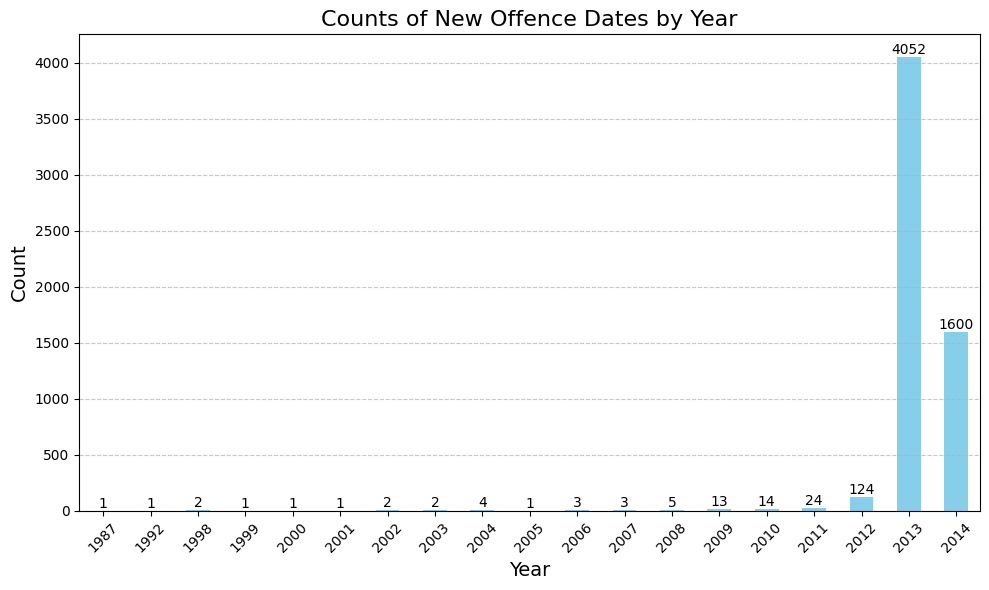

In [28]:
df['c_offense_date'] = pd.to_datetime(df['c_offense_date'])
df['c_arrest_date'] = pd.to_datetime(df['c_arrest_date'])

df['new_offence_date'] = df['c_offense_date'].fillna(df['c_arrest_date'])
df.new_offence_date

# Extracting year from new_offence_date
df['year'] = df['new_offence_date'].dt.year

# Counting occurrences of each year
year_counts = df['year'].value_counts().sort_index()

# Plotting the counts by year
plt.figure(figsize=(10, 6))
year_counts.plot(kind='bar', color='skyblue')
plt.title('Counts of New Offence Dates by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, count in enumerate(year_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')
plt.tight_layout()
plt.show()


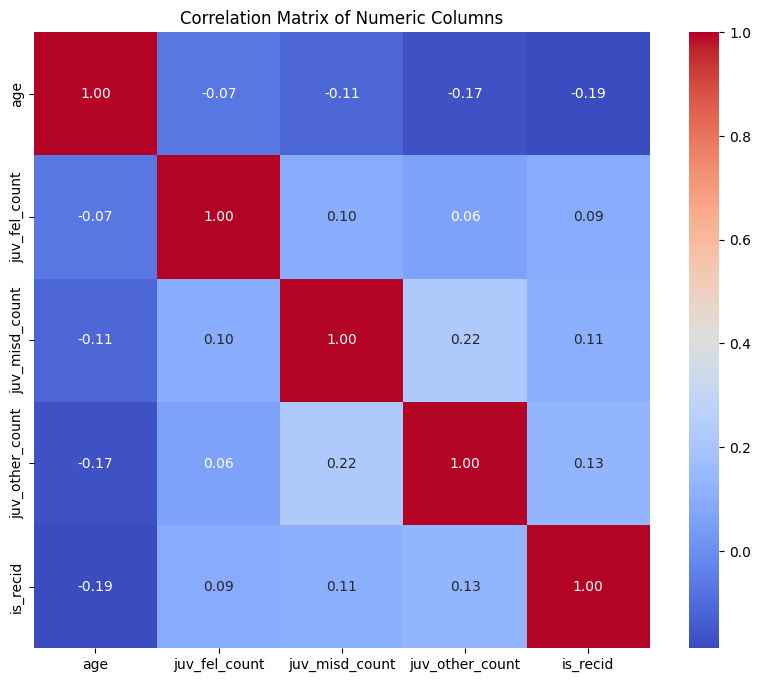

In [37]:
# Select numeric columns
numeric_columns = df[['age',
                      'juv_fel_count',
                      'juv_misd_count',
                      'juv_other_count',
                      'is_recid']]

# Calculate correlation matrix
correlation_matrix = numeric_columns.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

/tmp/ipykernel_4951/313924728.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['c_offense_date'] = pd.to_datetime(df['c_offense_date'])


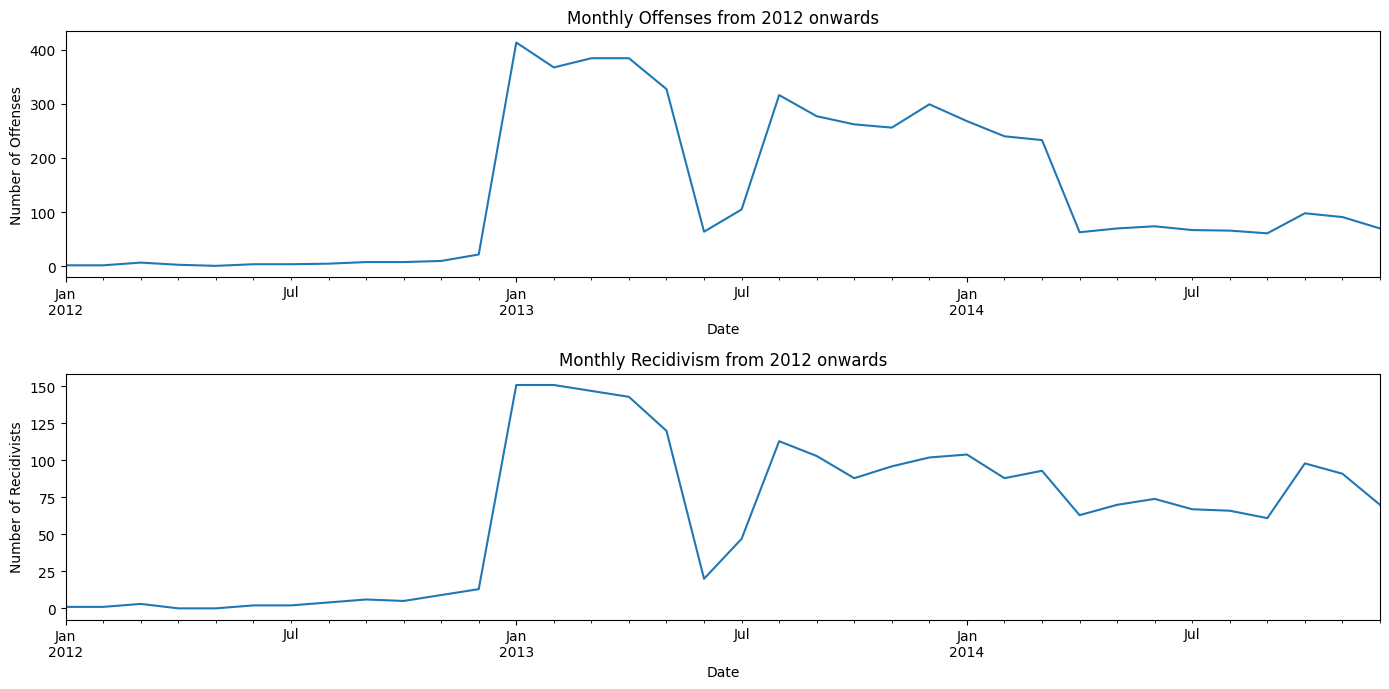

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and it has been preprocessed

# Filter the data to include only records from 2012 onwards
df = df[df['c_offense_date'] >= '2012-01-01']

# Ensure 'c_offense_date' is a datetime type
df['c_offense_date'] = pd.to_datetime(df['c_offense_date'])

# Resample to get monthly data for offenses and recidivism
monthly_offenses = df.resample('M', on='c_offense_date').size()
monthly_recid = df[df['is_recid'] == 1].resample('M', on='c_offense_date').size()

# Plot the monthly trends
plt.figure(figsize=(14, 7))

# 1st Graph: Monthly Offenses from 2012 onwards
plt.subplot(2, 1, 1)
monthly_offenses.plot()
plt.title('Monthly Offenses from 2012 onwards')
plt.ylabel('Number of Offenses')
plt.xlabel('Date')

# 3rd Graph: Monthly Recidivism from 2012 onwards
plt.subplot(2, 1, 2)
monthly_recid.plot()
plt.title('Monthly Recidivism from 2012 onwards')
plt.ylabel('Number of Recidivists')
plt.xlabel('Date')

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Distribution of priors_count')

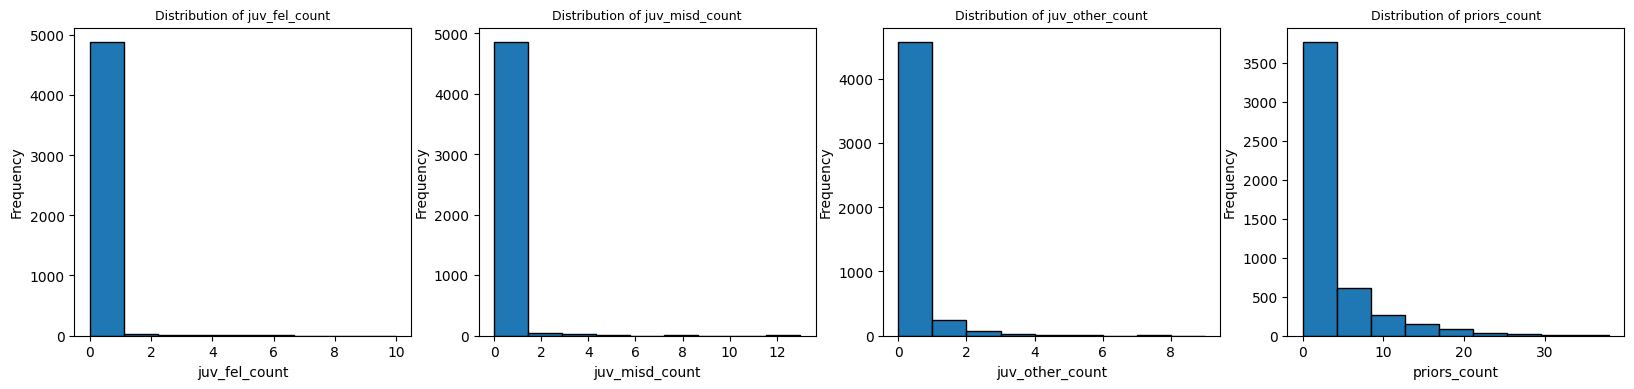

In [31]:
# Plotting histograms for each variable
plt.figure(figsize=(20, 4))

plt.subplot(1, 4, 1)
plt.hist(df['juv_fel_count'], bins=9, edgecolor='black')
plt.xlabel('juv_fel_count')
plt.ylabel('Frequency')
plt.title('Distribution of juv_fel_count',fontsize=9)

plt.subplot(1, 4, 2)
plt.hist(df['juv_misd_count'], bins=9, edgecolor='black')
plt.xlabel('juv_misd_count')
plt.ylabel('Frequency')
plt.title('Distribution of juv_misd_count',fontsize=9)

plt.subplot(1, 4, 3)
plt.hist(df['juv_other_count'], bins=9, edgecolor='black')
plt.xlabel('juv_other_count')
plt.ylabel('Frequency')
plt.title('Distribution of juv_other_count',fontsize=9)

plt.subplot(1, 4, 4)
plt.hist(df['priors_count'], bins=9, edgecolor='black')
plt.xlabel('priors_count')
plt.ylabel('Frequency')
plt.title('Distribution of priors_count',fontsize=9)

/tmp/ipykernel_4951/2351174526.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['c_offense_date'] = pd.to_datetime(df['c_offense_date'])  # Convert to datetime
/tmp/ipykernel_4951/2351174526.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_month'] = df['c_offense_date'].dt.to_period('M')


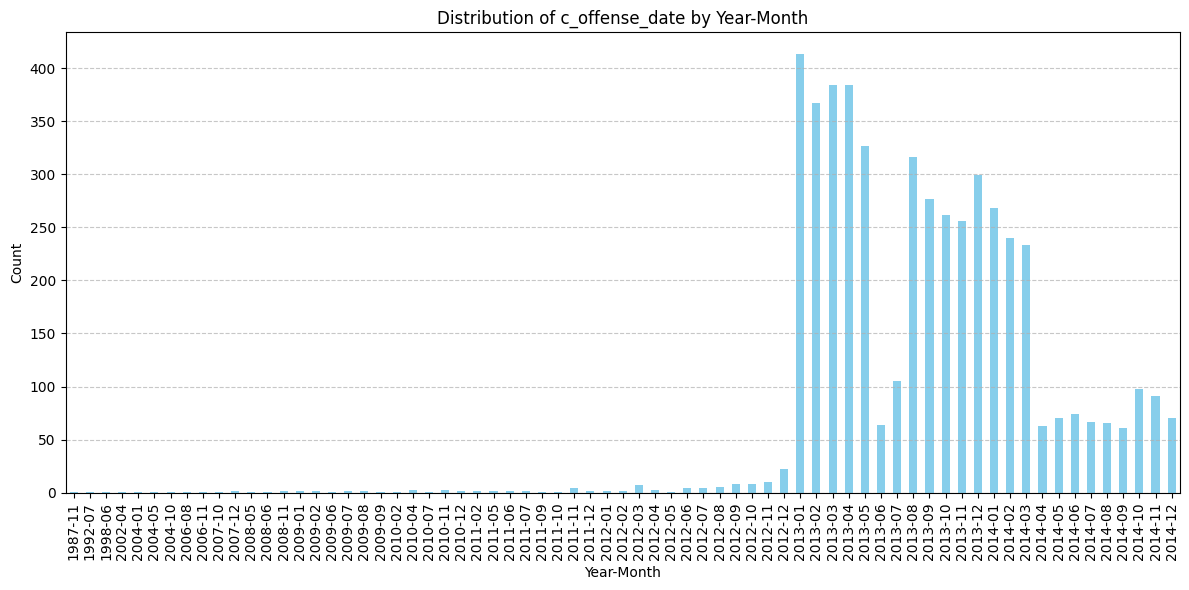

In [44]:
import pandas as pd
import matplotlib.pyplot as plt


df['c_offense_date'] = pd.to_datetime(df['c_offense_date'])  # Convert to datetime

# Extract year and month
df['year_month'] = df['c_offense_date'].dt.to_period('M')

# Group by year_month and count occurrences
monthly_counts = df['year_month'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(12, 6))
monthly_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of c_offense_date by Year-Month')
plt.xlabel('Year-Month')
plt.ylabel('Count')

# Decrease font size of x-axis tick labels
plt.xticks(fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


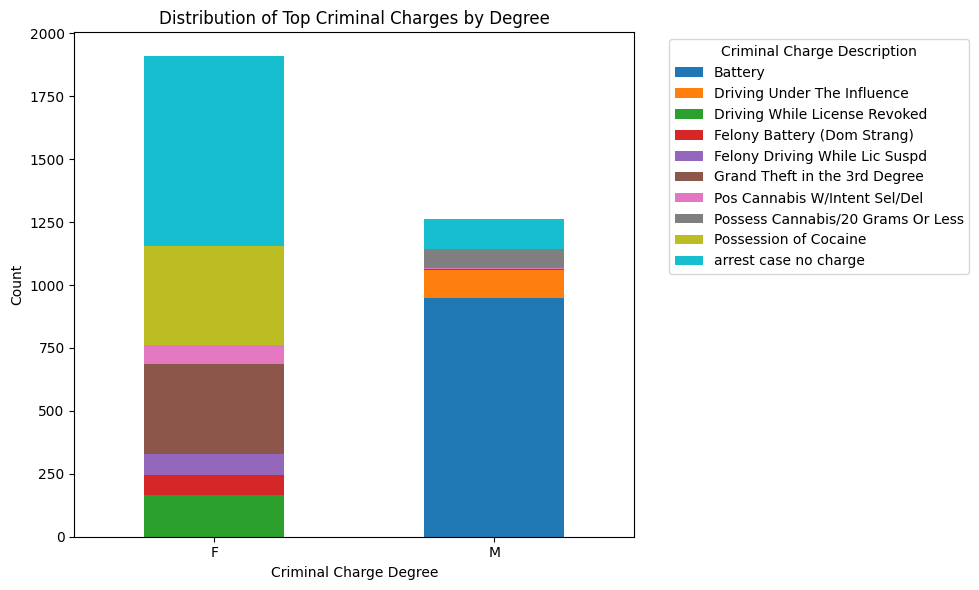

In [45]:
# Get top N most common c_charge_desc
top_n = 10  # Change to the number of top categories you want to include
top_desc = df['c_charge_desc'].value_counts().nlargest(top_n).index

# Filter DataFrame for top categories
df_top = df[df['c_charge_desc'].isin(top_desc)]

# Group by c_charge_degree and c_charge_desc and count occurrences
charge_counts = df_top.groupby(['c_charge_degree', 'c_charge_desc']).size().unstack(fill_value=0)

# Plotting
ax = charge_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Top Criminal Charges by Degree')
plt.xlabel('Criminal Charge Degree')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Move legend outside the plot
plt.legend(title='Criminal Charge Description', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [17]:
df.c_charge_desc.value_counts()

c_charge_desc
Battery                            946
Possession of Cocaine              396
Grand Theft in the 3rd Degree      363
Driving While License Revoked      165
Driving Under The Influence        107
                                  ... 
Delivery Of Drug Paraphernalia       1
Deliver Cocaine 1000FT Church        1
Battery On Fire Fighter              1
Grand Theft In The 3Rd Degree        1
Offer Agree Secure For Lewd Act      1
Name: count, Length: 380, dtype: int64

/home/teresaramoos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/teresaramoos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/teresaramoos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


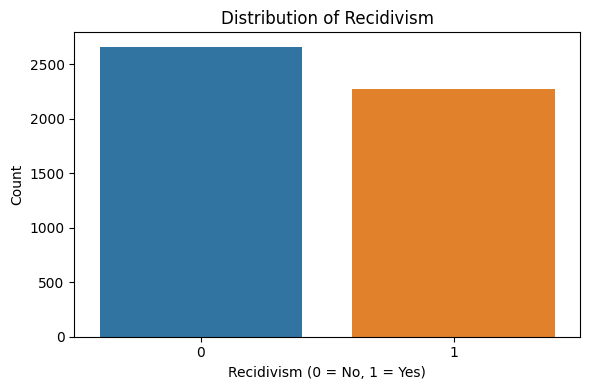

In [18]:
# Count occurrences of each category
recid_counts = df['is_recid'].value_counts()

# Plotting
plt.figure(figsize=(6, 4))
sns.barplot(x=recid_counts.index, y=recid_counts.values)
plt.title('Distribution of Recidivism')
plt.xlabel('Recidivism (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()